# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [42]:
# Start coding here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

Here, we import all the necessary libraries for data analysis, data visualization, and numerical computations.

In [43]:
# Load the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv',index_col='recipe')
print(df.shape)
df.head(20)


(947, 7)


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
9,538.52,3.78,3.37,3.79,Pork,6,High


This code reads the CSV file **'recipe_site_traffic_2212.csv'** into a DataFrame and sets the **'recipe'** column as the index. It then prints the shape of the DataFrame and displays the first 20 rows to inspect the data.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


The df.info() command provides a summary of the DataFrame.

# Data Validation

In [45]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


This code checks for missing (null) values in each column of the dataset.

In [46]:
# Fill missing values in 'high_traffic' column with 'low'
df['high_traffic'].fillna('low', inplace=True)
df.rename(columns={'high_traffic': 'traffic'}, inplace=True)

We are filling the missing values in the **"high_traffic"** column with the string **'low'**. This assumes that the missing values represent low traffic by default. We are also renaming the **"high_traffic"** column to **"traffic"** to make the column name more concise.

In [47]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
traffic          0
dtype: int64


In [48]:
# Set 'category' and 'traffic' columns as category datatype
df['category'] = df['category'].astype('category')
df['traffic'] = df['traffic'].astype('category')

We are converting the **'category'** and **'traffic'** columns to the **category** datatype, which is more efficient for storing categorical data.

In [49]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [50]:
# Replace non-numeric values with appropriate numeric servings
df['servings'] = df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'})
df['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

We are replacing the non-numeric values ('4 as a snack' and '6 as a snack') in the **'servings'** column with their numeric equivalents (4 and 6) to ensure **consistency** in the data.

In [51]:
df['servings'] = df['servings'].astype(int)

The **'servings'** column is being converted from string to **integer** type to facilitate numerical analysis and computations.

In [52]:
df['category'].unique()

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', ..., 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert']
Length: 11
Categories (11, object): ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']

In [53]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Dessert            83
Vegetable          83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [54]:
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

We have replaced the category **'Chicken Breast'** with **'Chicken'** to make the categorization more specific.

In [55]:
df.drop_duplicates(inplace=True)
print(df.shape)

(922, 7)


This code **removes any duplicate** rows from the dataset to ensure that each row represents unique data.

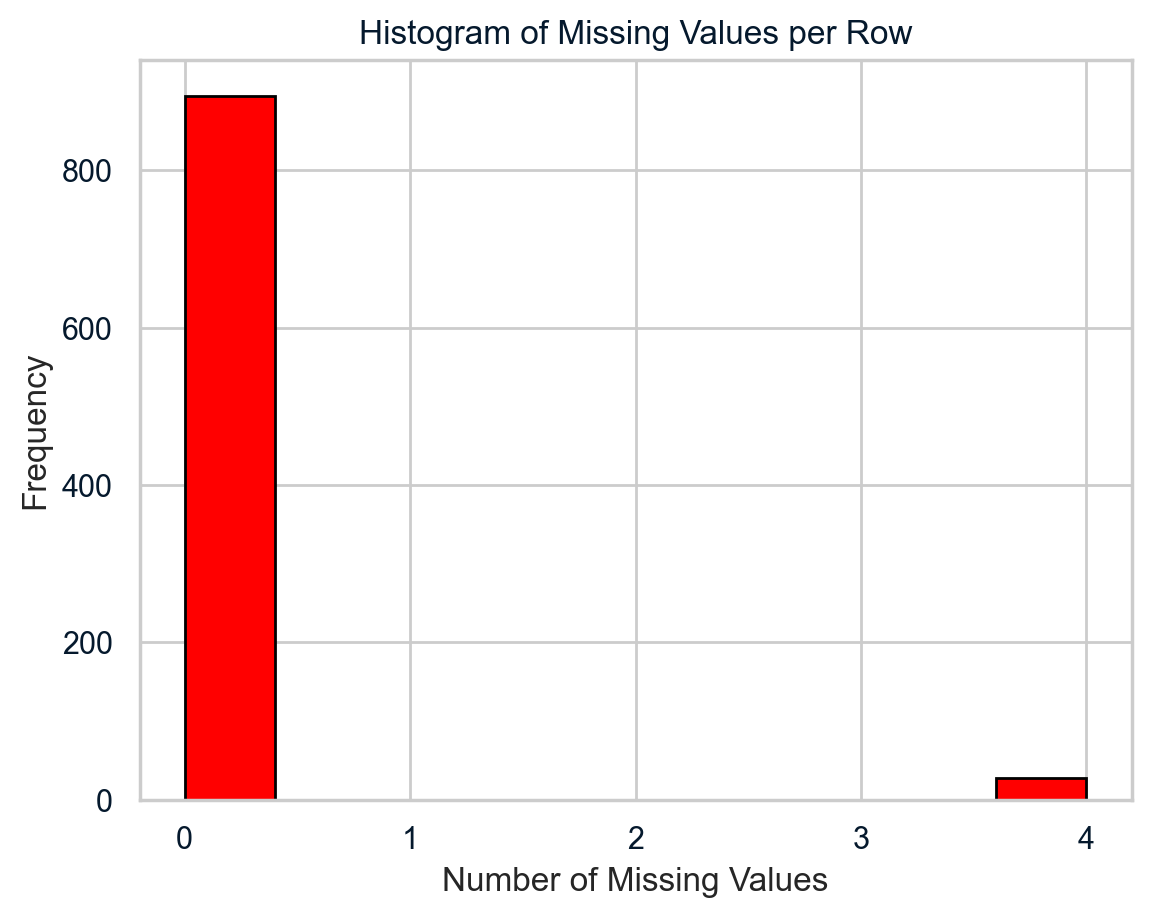

In [56]:
df.isnull().sum(axis=1).hist(bins=10, color='red', edgecolor='black')
plt.xticks(range(0, int(df.isnull().sum(axis=1).max()) + 1))
plt.title('Histogram of Missing Values per Row')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.show()

This code plots a **histogram** showing the distribution of the number of **missing values per row** in the dataset. We can observe that majority of the rows have no missing values and only a few rows have 4 missing values.

In [57]:
# Count the number of rows with a specific number of missing values
missing_values_count = df.isnull().sum(axis=1).value_counts().sort_index()

# Display the result
print(missing_values_count)


0    895
4     27
dtype: int64


In [58]:
# Drop rows with 4 missing values
df_cleaned = df[df.isnull().sum(axis=1) != 4]

# Verify the rows have been dropped
print(df_cleaned.shape)


(895, 7)


Here, we **drop** the rows that contain 4 missing values as those are not significant for our analysis.

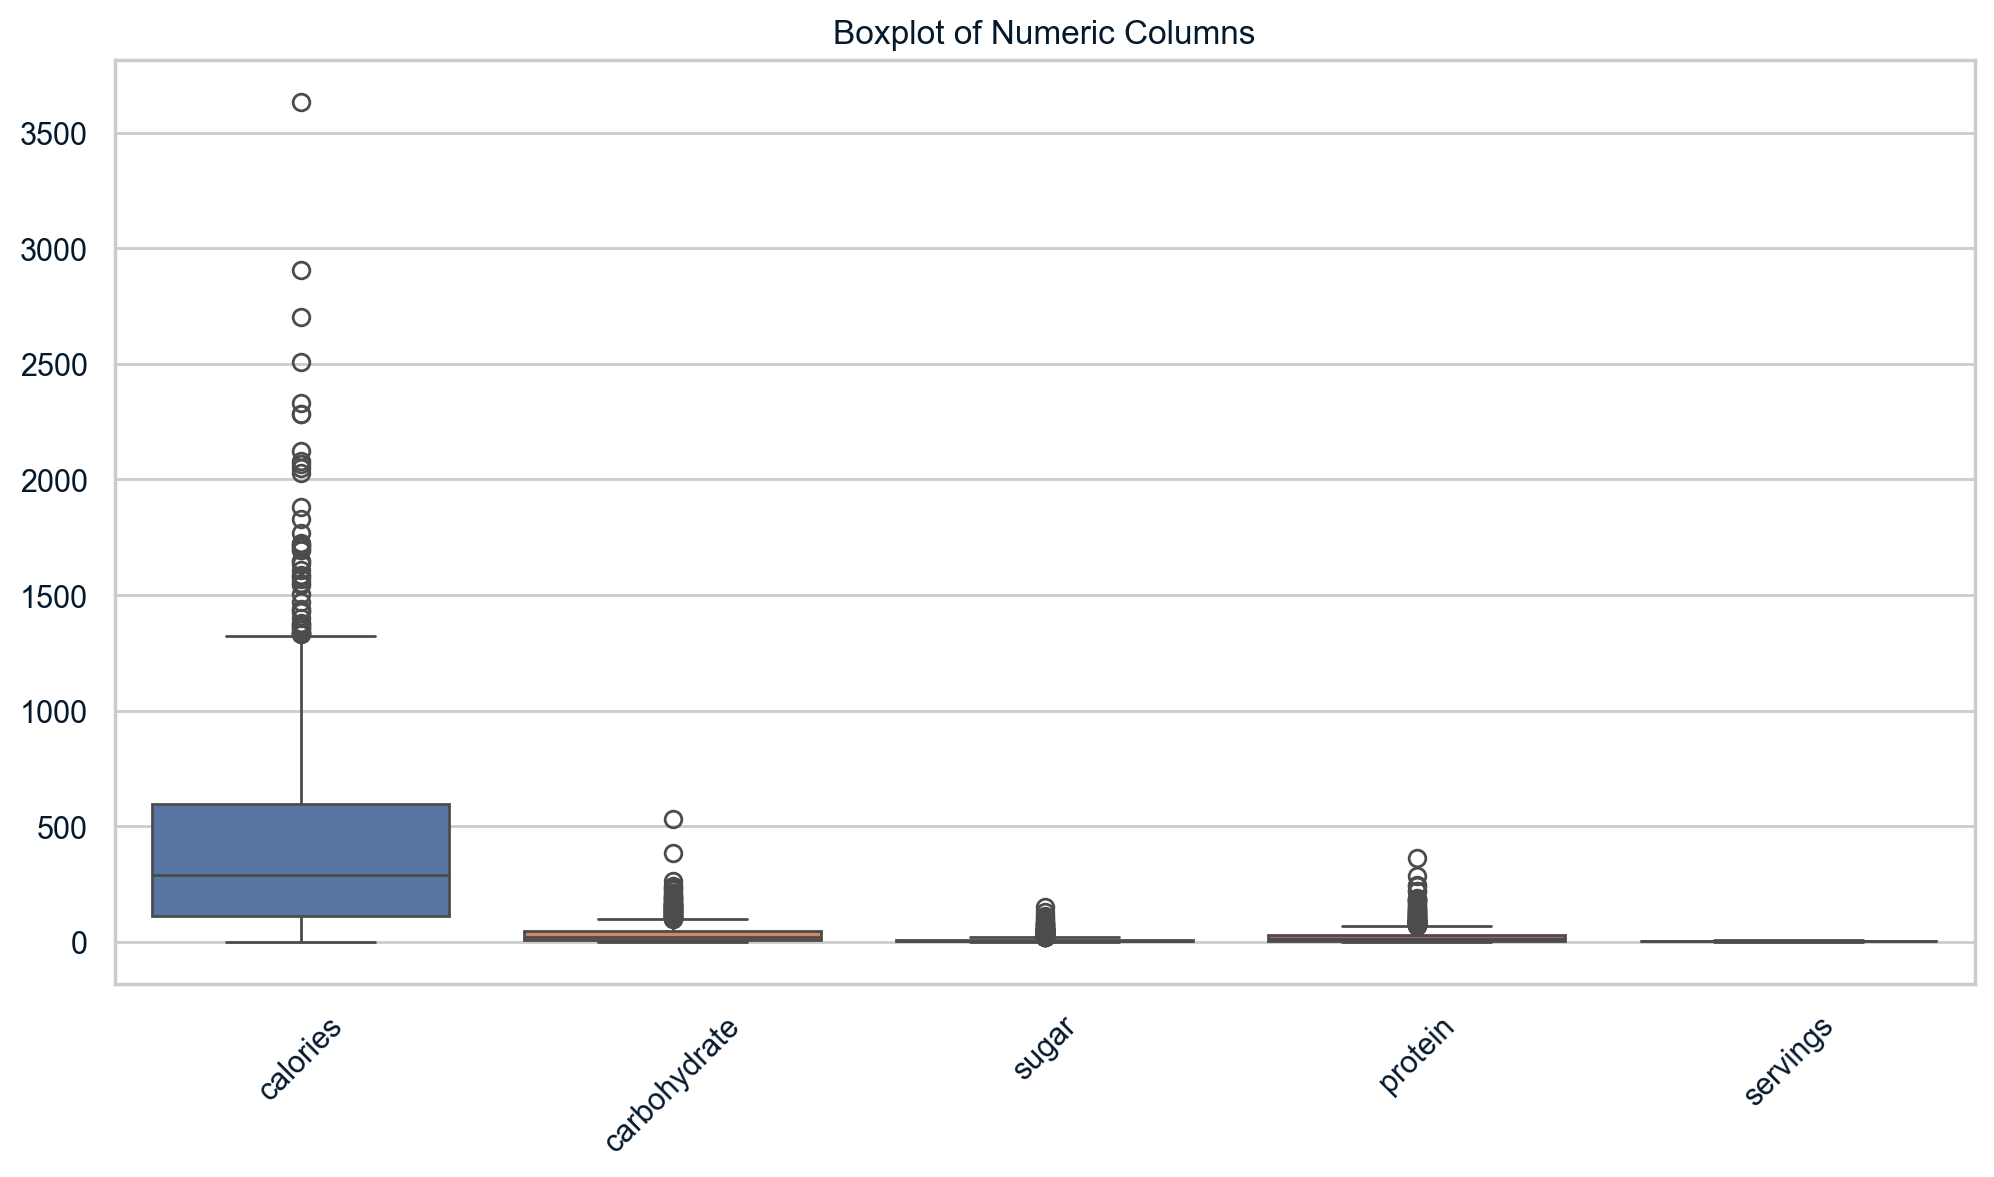

In [59]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plot the boxplot for numeric columns to detect outliers
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


The code selects the **numeric columns** from the cleaned dataset and creates a **boxplot** for each numeric column to help visualize the distribution and detect **outliers**.

In [60]:
def remove_outliers(df):
    # Define the function to handle outliers in each column
    def handle_outlier(col):
        Q3 = df[col].quantile(0.75)
        Q1 = df[col].quantile(0.25)
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        # Replace outlier values with the boundary values (upper or lower)
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

    # Apply the outlier removal function to each numeric column in the DataFrame
    numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
    for col in numeric_columns:
        handle_outlier(col)

    return df

# Apply the function to remove outliers by replacing values
df_no_outliers = remove_outliers(df_cleaned)

# Verify the shape of the new DataFrame
print(f"Shape after removing outliers: {df_no_outliers.shape}")

Shape after removing outliers: (895, 7)


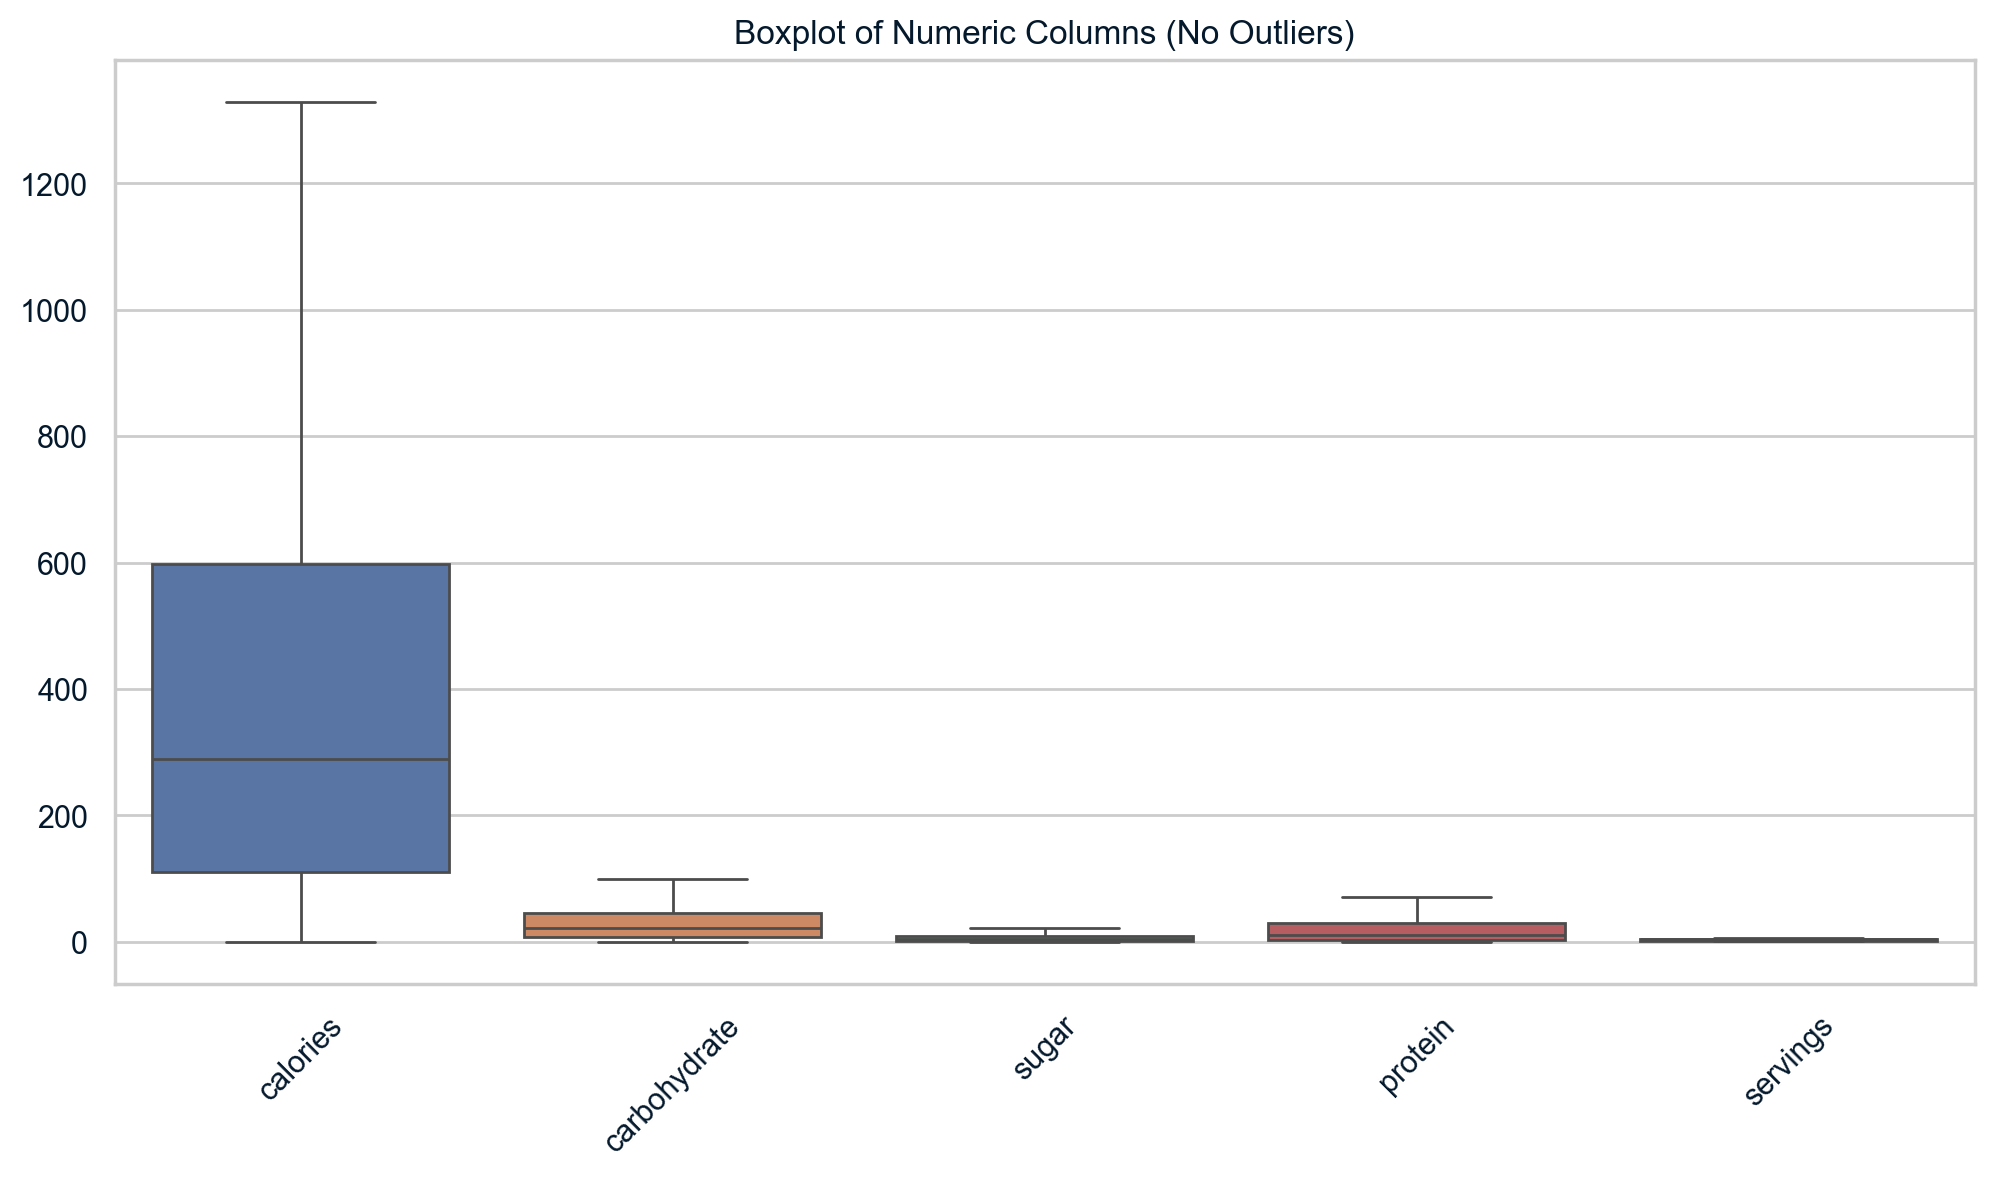

In [61]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plot the boxplot for numeric columns of df_no_outliers to detect outliers
numeric_columns_no_outliers = df_no_outliers.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numeric_columns_no_outliers])
plt.title('Boxplot of Numeric Columns (No Outliers)')
plt.xticks(rotation=45)
plt.show()

We have set the outliers to **boundary values** (lower bound and upper bound) to maintain consistency of the dataset. Now the boxplot shows that there are **no outliers**.

# Exploratory Analysis

Summary statistics for numerical columns:
          calories  carbohydrate       sugar     protein    servings
count   895.000000    895.000000  895.000000  895.000000  895.000000
mean    413.361665     31.083430    6.834866   20.124053    3.458101
std     378.241095     28.945415    6.624471   22.111812    1.735979
min       0.140000      0.030000    0.010000    0.000000    1.000000
25%     110.430000      8.375000    1.690000    3.195000    2.000000
50%     288.550000     21.480000    4.550000   10.800000    4.000000
75%     597.650000     44.965000    9.800000   30.200000    4.000000
max    1328.480000     99.850000   21.965000   70.707500    6.000000

Frequency of categories in the 'category' column:
Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64


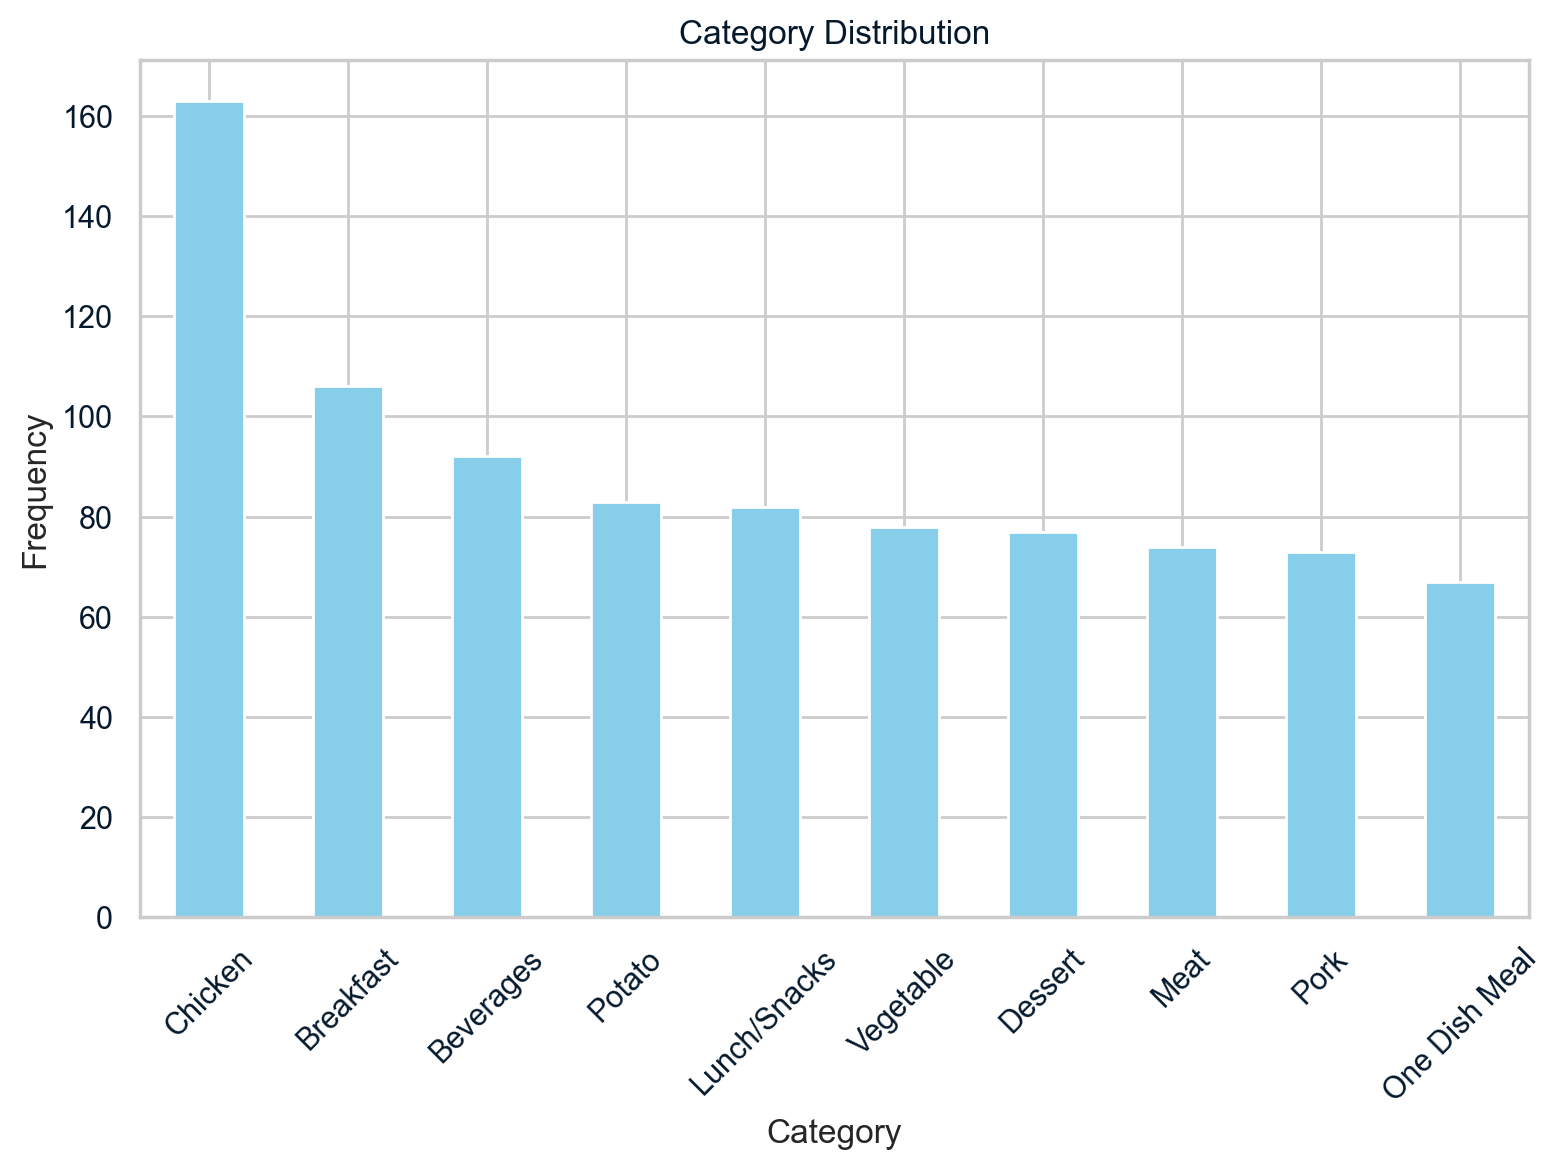


Frequency of categories in the 'traffic' column:
High    535
low     360
Name: traffic, dtype: int64


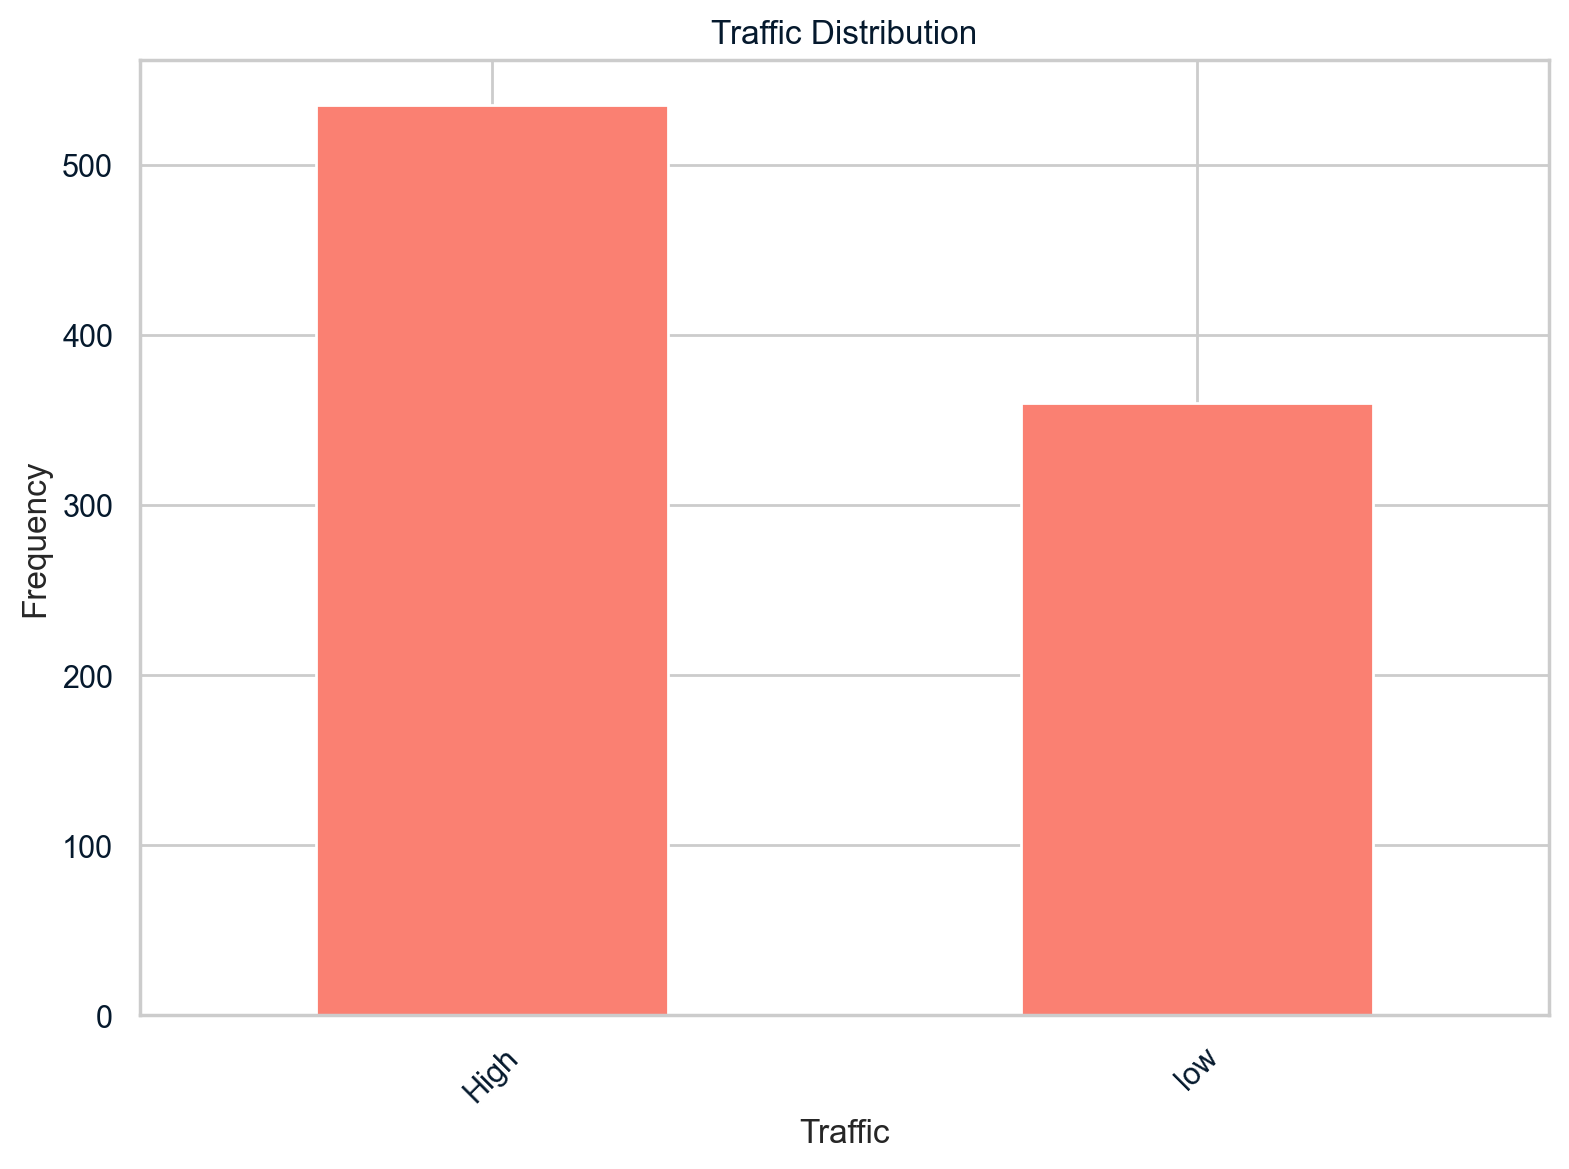

In [62]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df_no_outliers.describe())

# Frequency of categories in 'category' column
print("\nFrequency of categories in the 'category' column:")
category_counts = df_no_outliers['category'].value_counts()
print(category_counts)

# Plotting the frequency of categories in the 'category' column
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Frequency of categories in 'traffic' column
print("\nFrequency of categories in the 'traffic' column:")
traffic_counts = df_no_outliers['traffic'].value_counts()
print(traffic_counts)

# Plotting the frequency of categories in the 'traffic' column
plt.figure(figsize=(8, 6))
traffic_counts.plot(kind='bar', color='salmon')
plt.title("Traffic Distribution")
plt.xlabel("Traffic")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We find the **summary** of basic statistics for the **numerical** columns in the cleaned dataset to understand their distribution. Then, we find the **frequency** of unique values in the **'category'** and **'traffic'** columns to gain insights.

## Target variable is set to Traffic - High
As we are trying to predict what factors lead to high traffic, this should be set as out target variable.

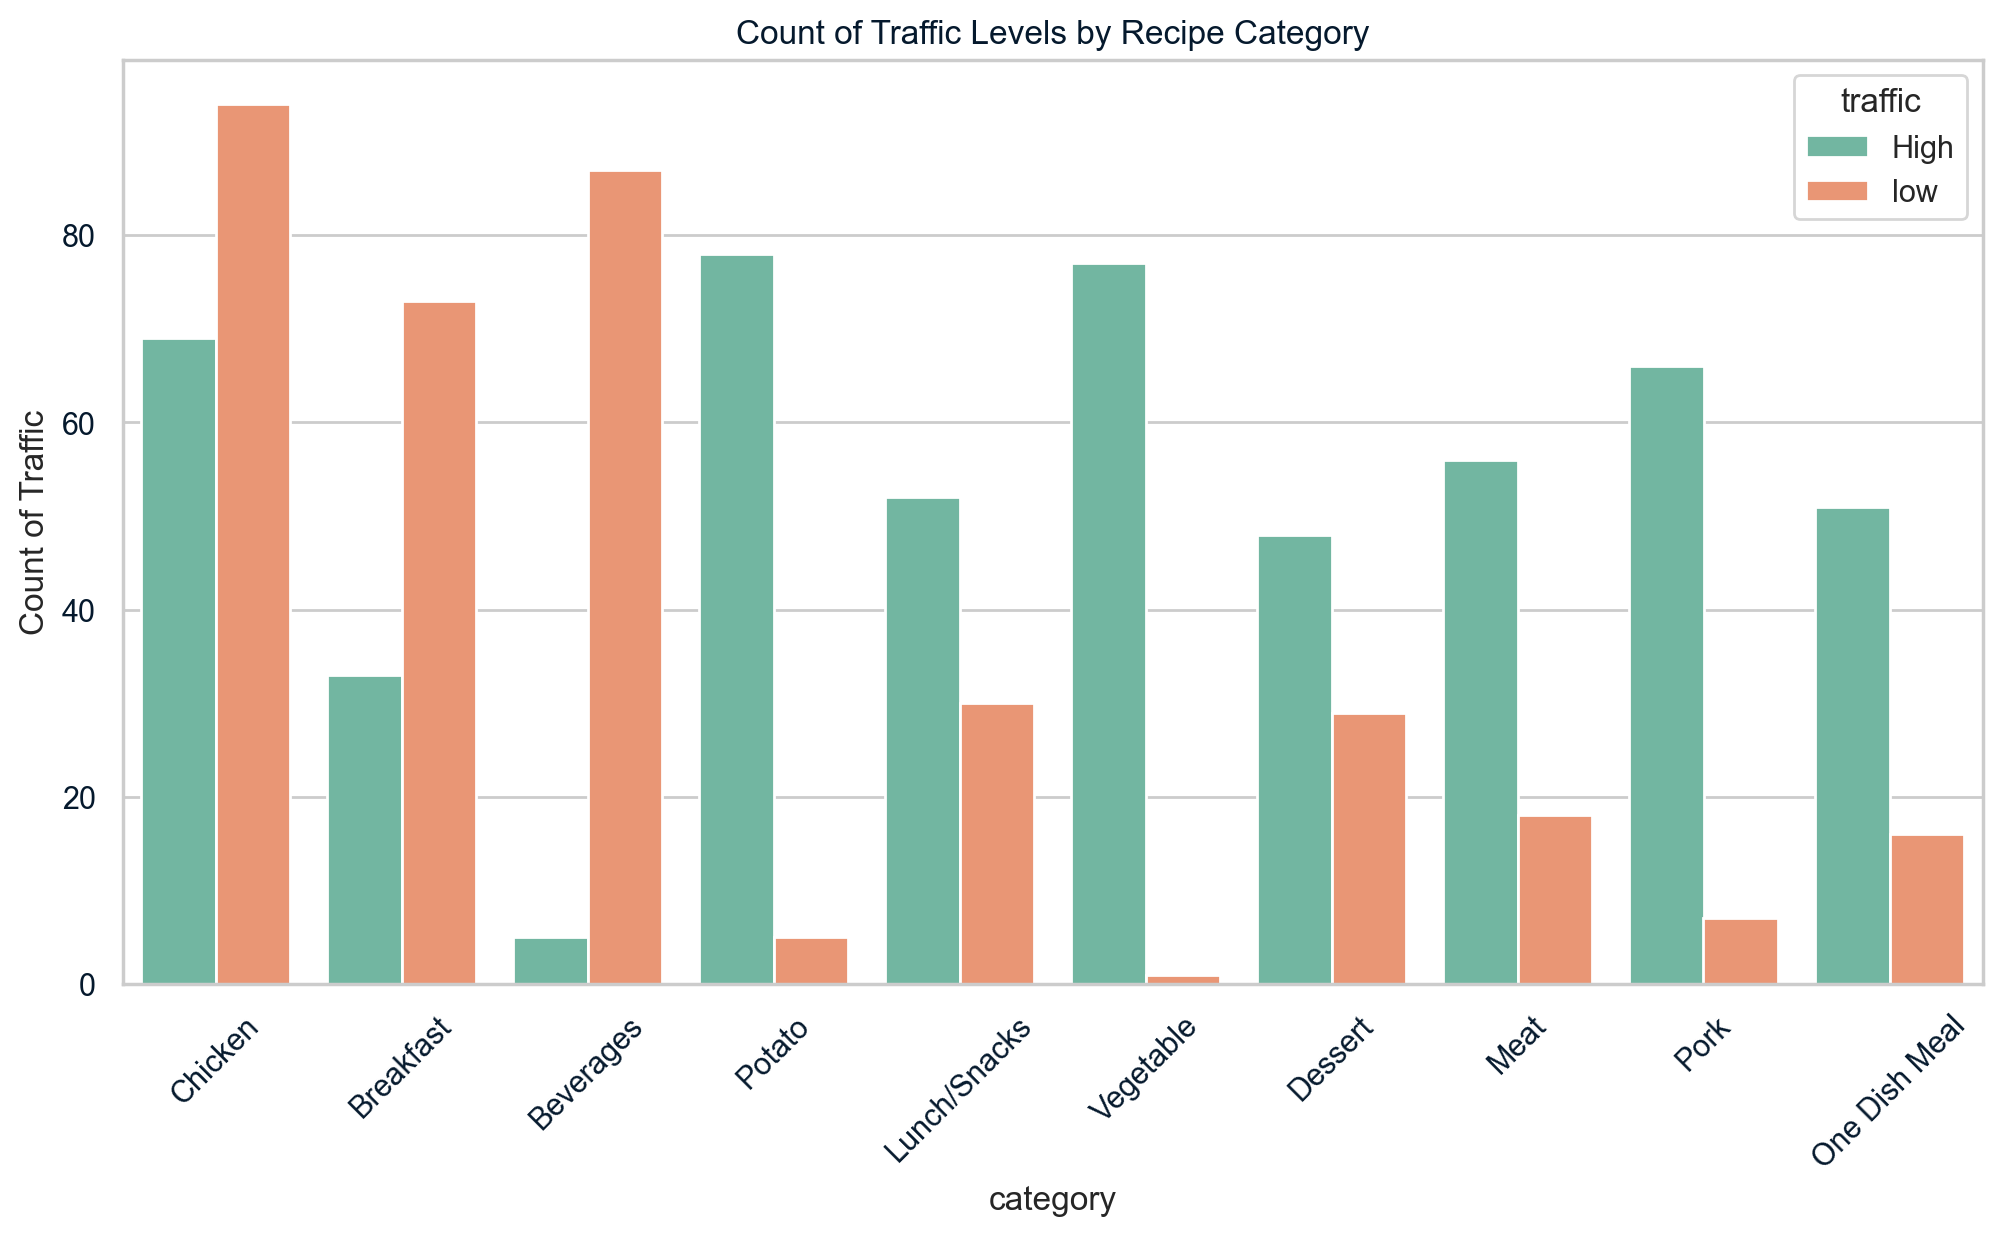

In [63]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plot countplot for 'category' with 'traffic' as hue
plt.figure(figsize=(12, 6))
sns.countplot(data=df_no_outliers, x='category', hue='traffic', order=df_no_outliers['category'].value_counts().index, palette="Set2")
plt.title('Count of Traffic Levels by Recipe Category')
plt.xticks(rotation=45)
plt.ylabel('Count of Traffic')
plt.show()

The countplot shows that **'Vegetable'** and **'Potato'** lead to **high** traffic in most occasions. **'Lunch/Snacks', 'Dessert', 'Meat', 'Pork'**, and **'One Dish Meal'** also have more count of high traffic in comparison to low traffic.

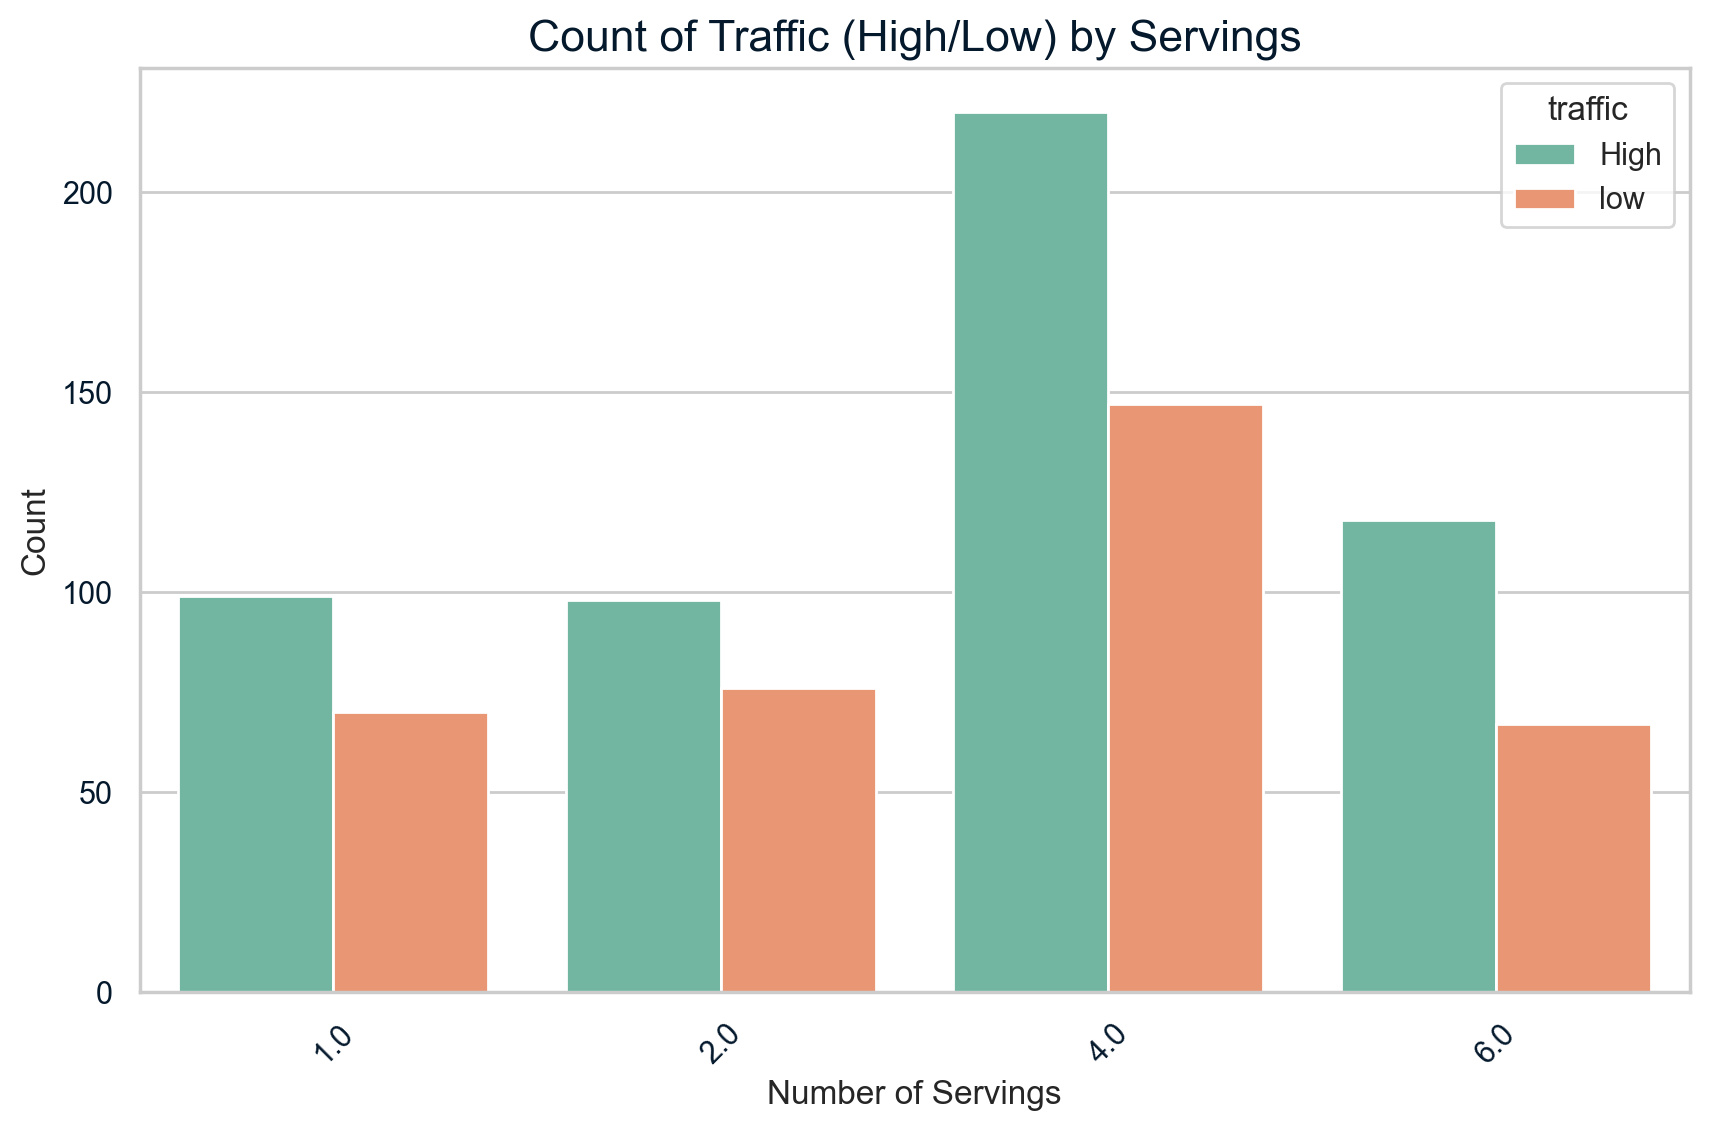

In [64]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the countplot for servings and traffic
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_outliers, x='servings', hue='traffic', palette='Set2')

# Add labels and title
plt.title('Count of Traffic (High/Low) by Servings', fontsize=16)
plt.xlabel('Number of Servings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Since, every serving has **greater** count of **high** traffic, this variable **does not** have much influence on our target variable.

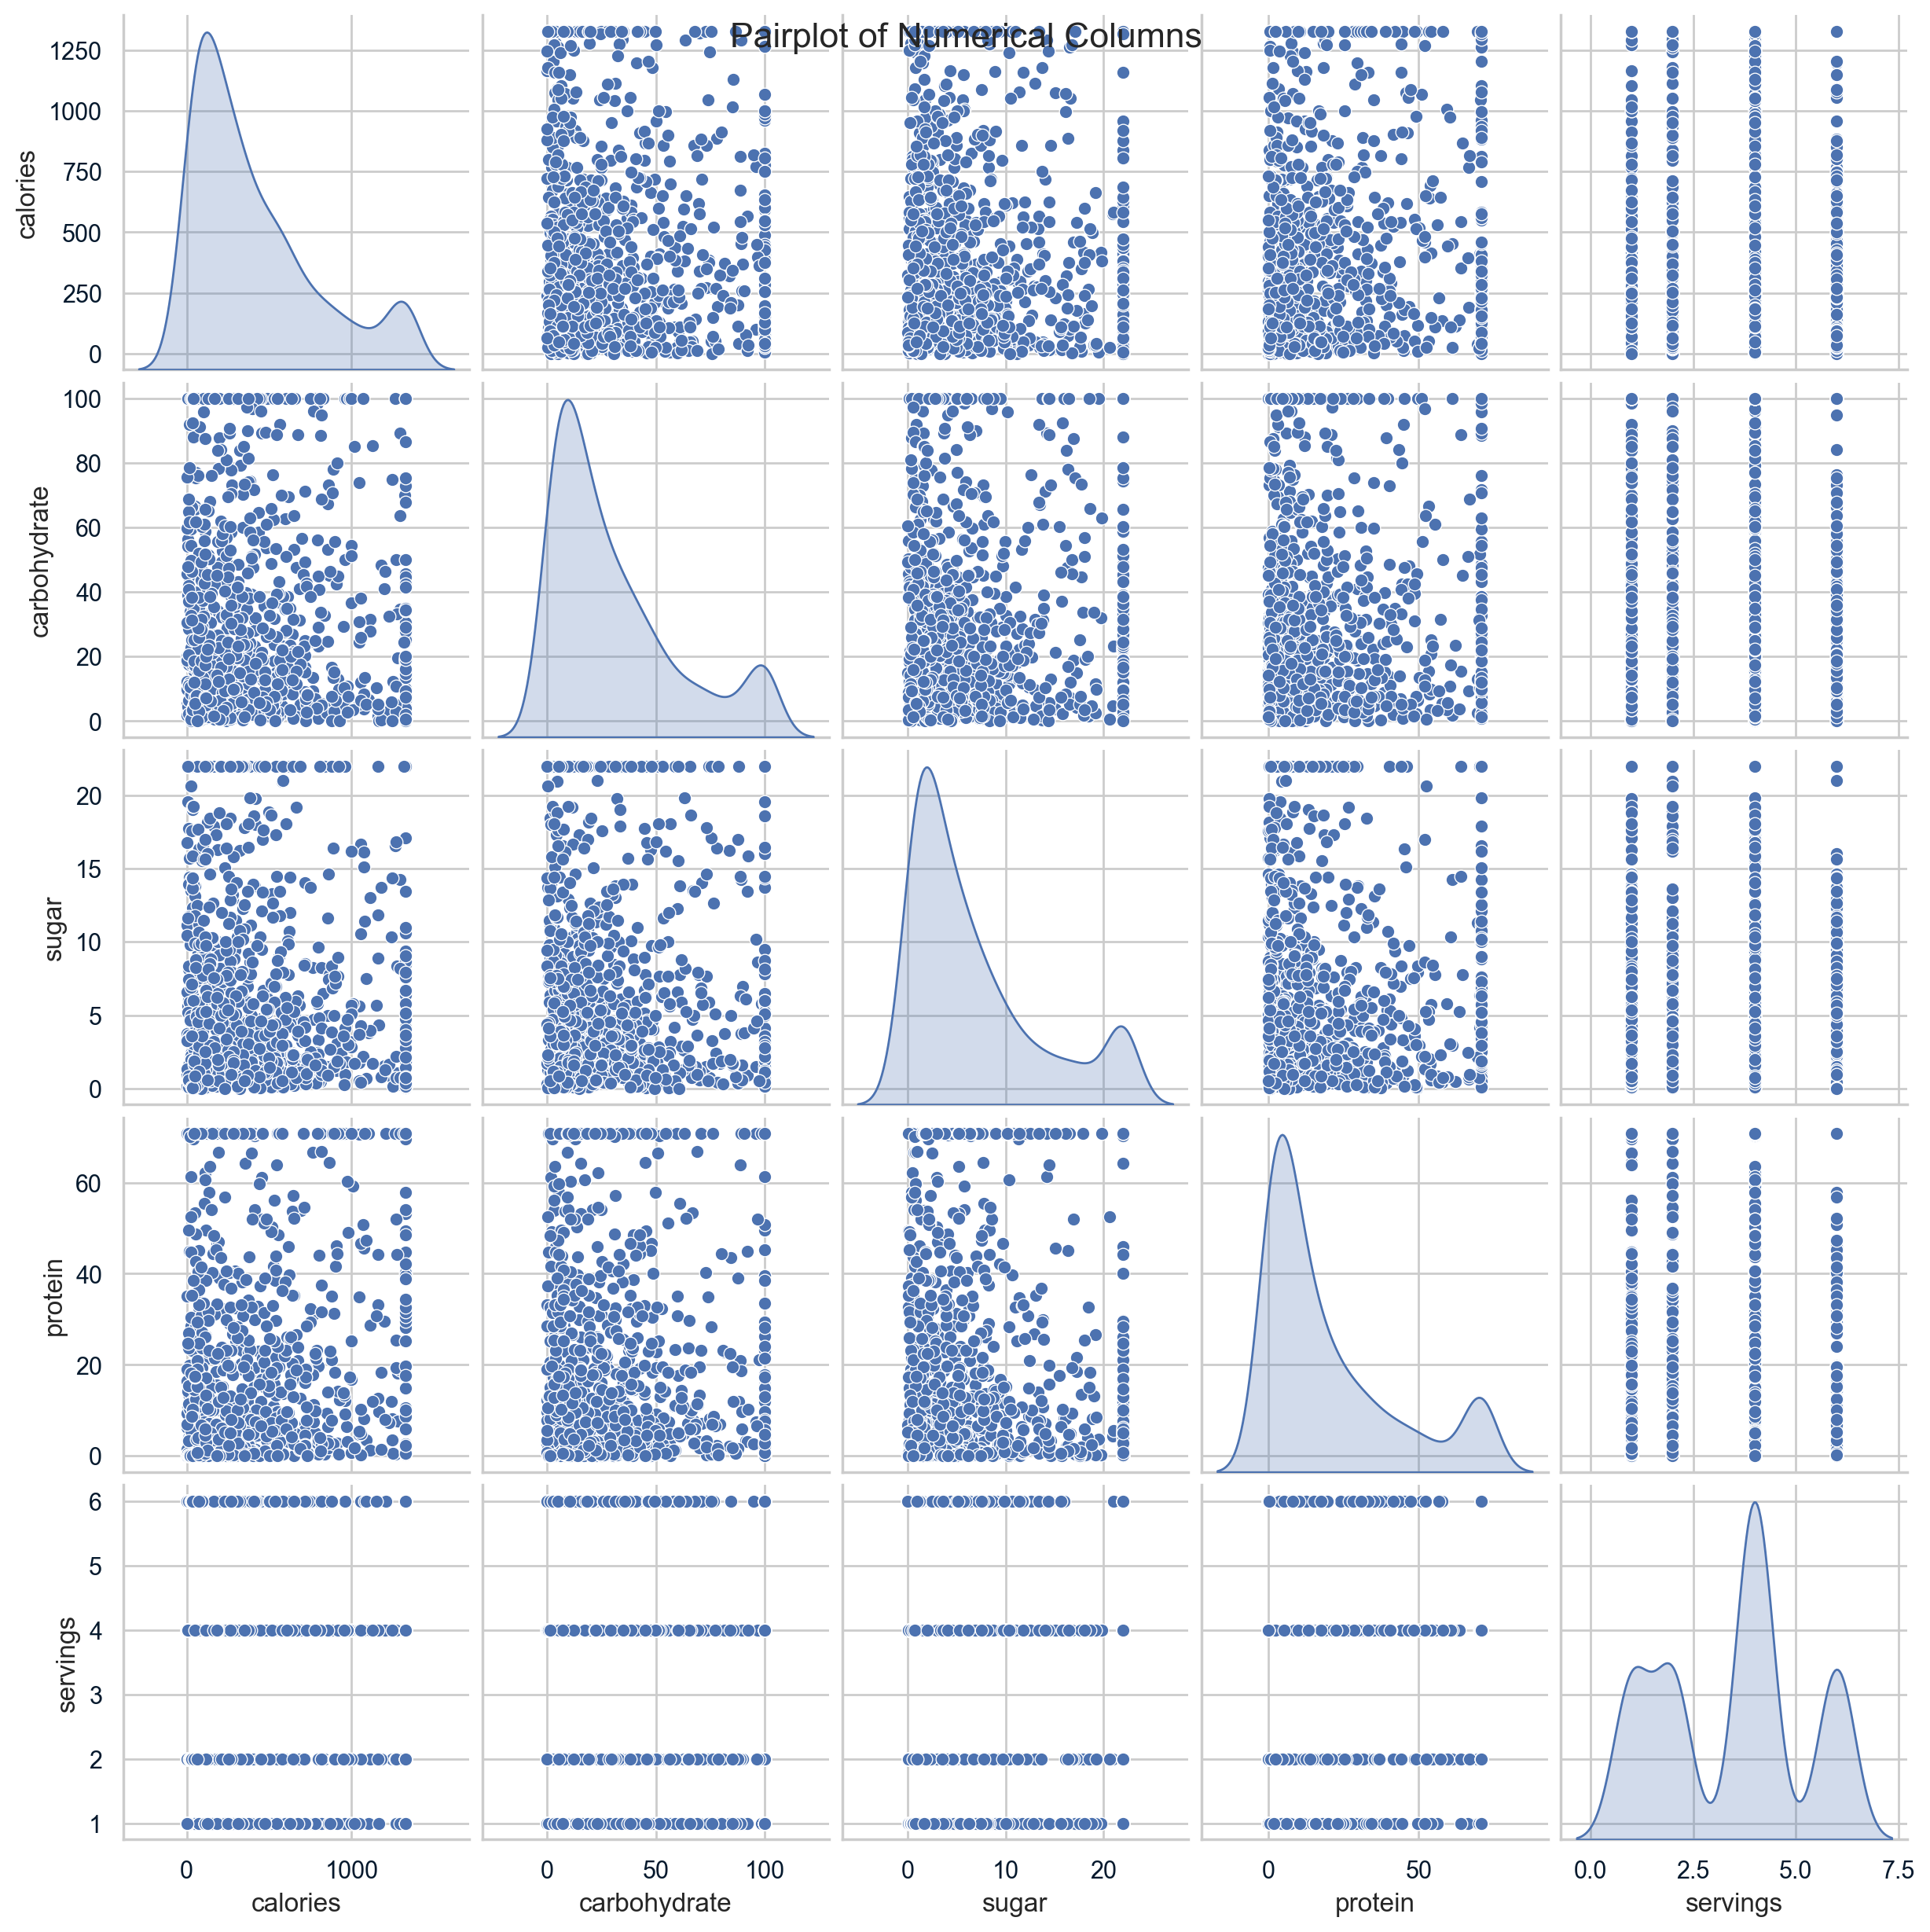

In [65]:
# Plot pairplot for numerical columns
sns.pairplot(df_no_outliers[numeric_columns], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numerical Columns', fontsize=16)
plt.show()

From the pairplot we can say that there is a **weak correlation** among **numeric** variables and that they are **rightly skewed**. 

<Figure size 1200x600 with 0 Axes>

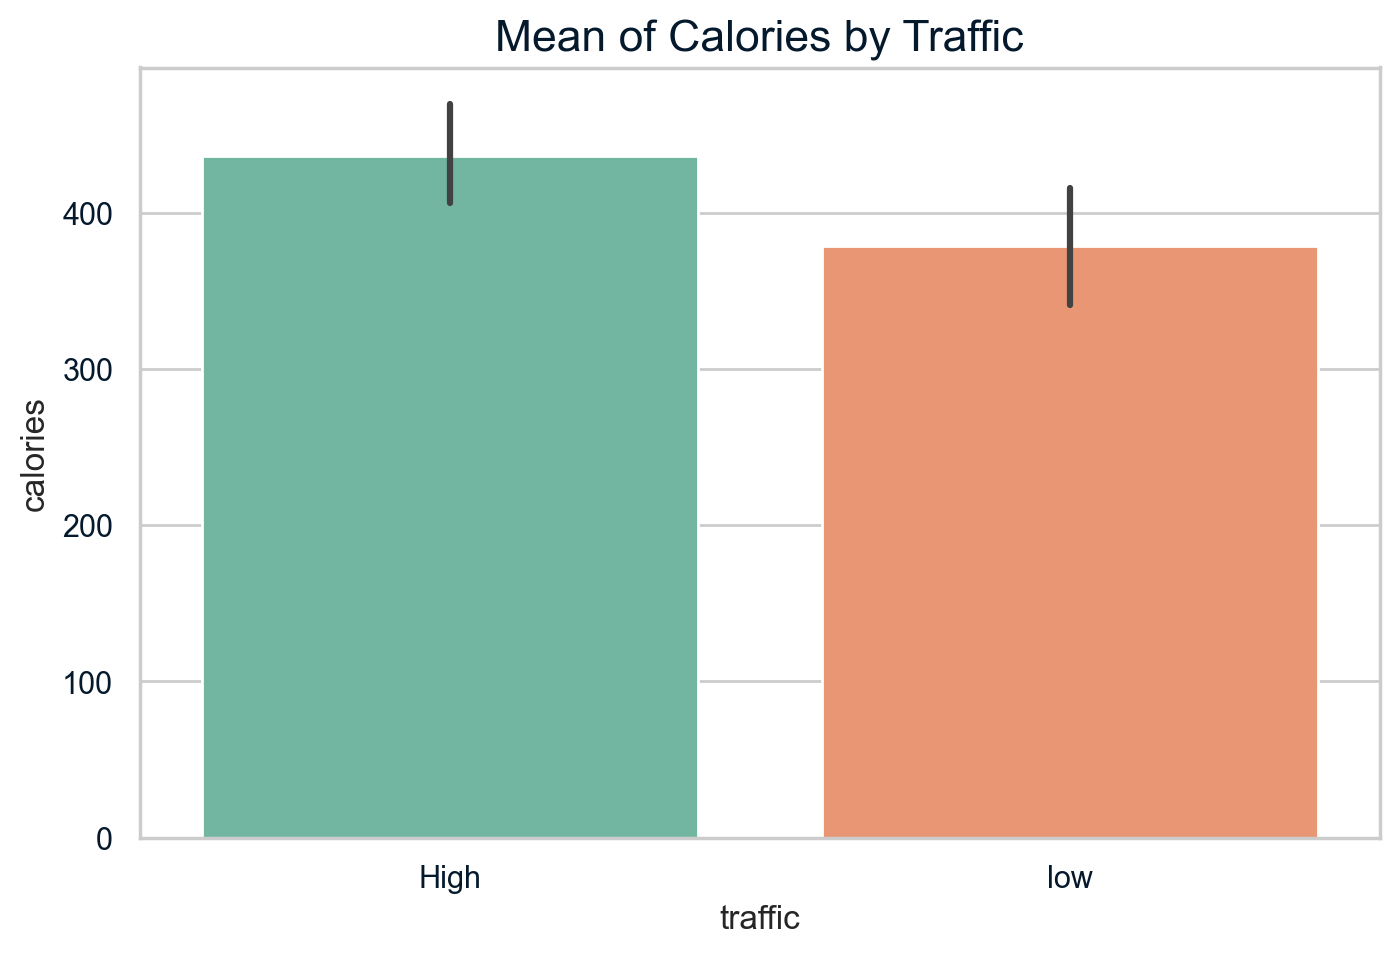

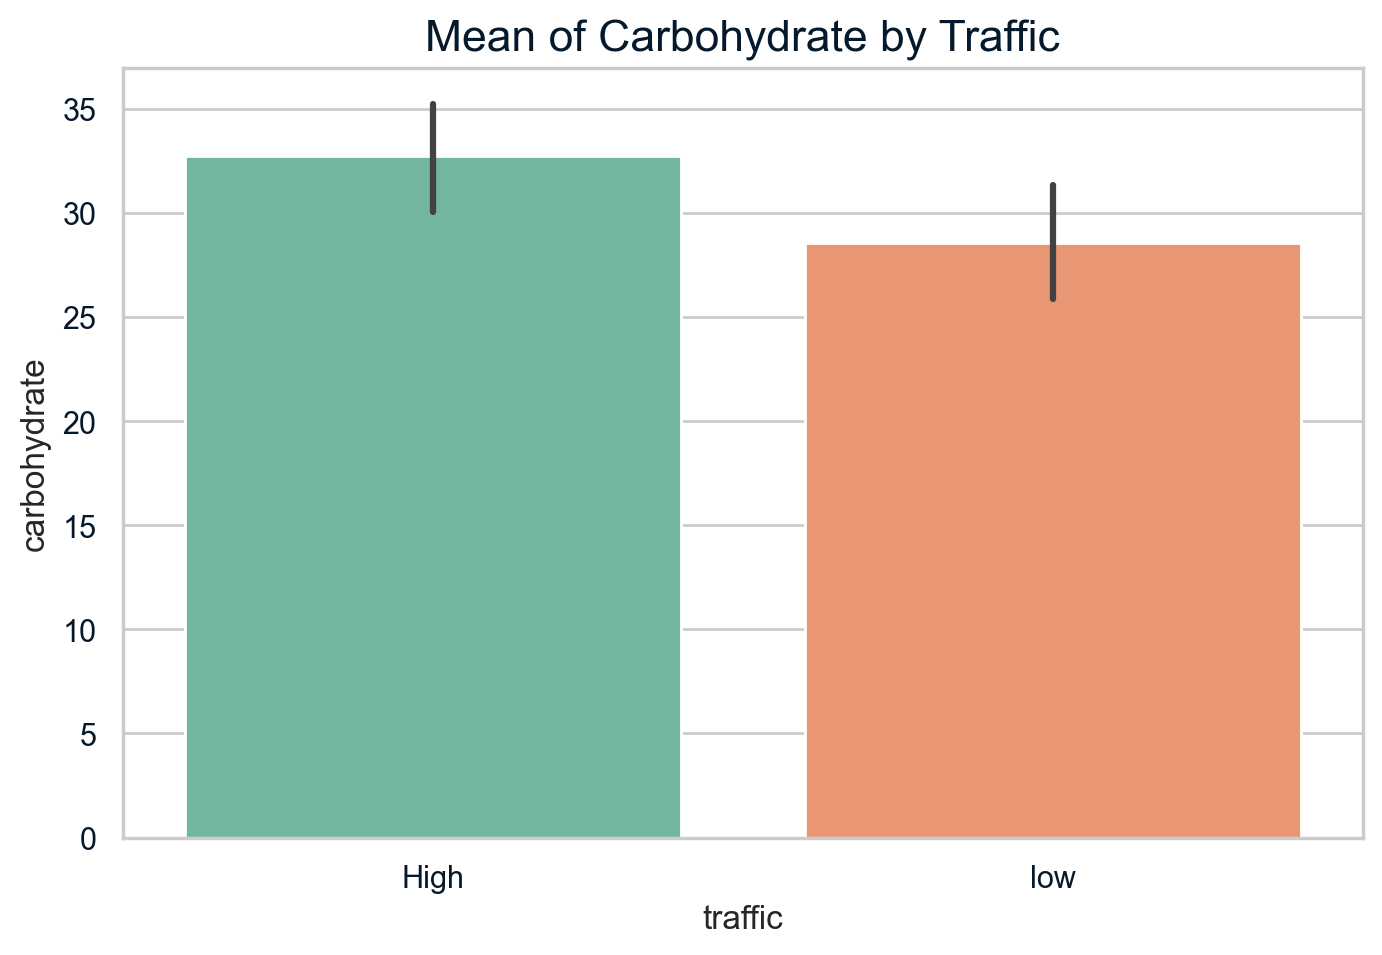

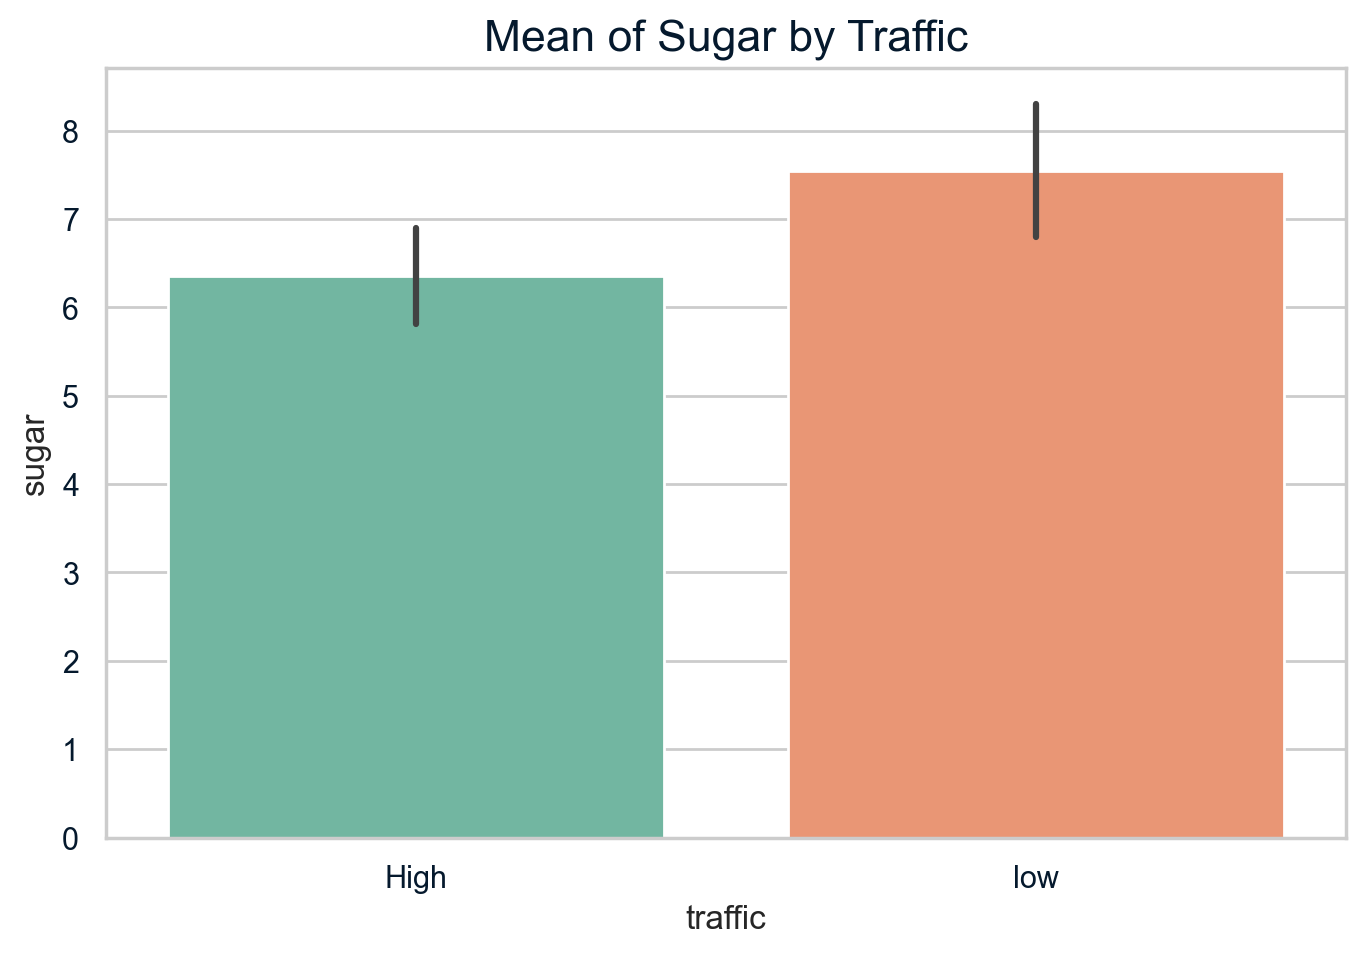

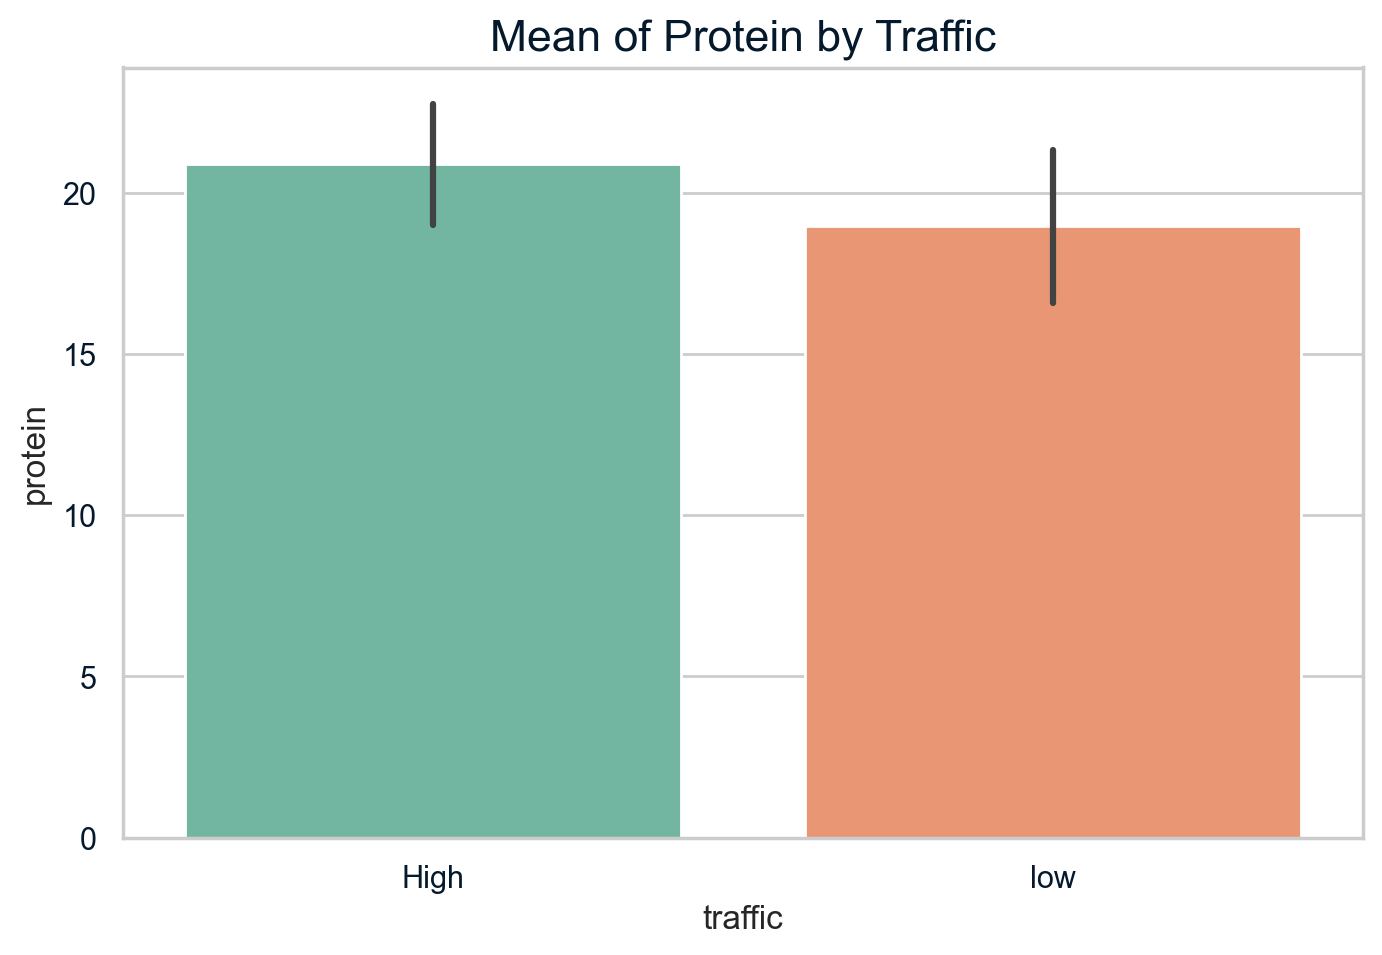

In [66]:
# List of numerical columns (excluding 'servings')
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='traffic', y=col, data=df_no_outliers, estimator='mean', palette='Set2')
    plt.title(f'Mean of {col.capitalize()} by Traffic', fontsize=16)
    plt.show()

In [67]:
# Calculate the mean for each numerical column grouped by 'traffic'
mean_values = df_no_outliers.groupby('traffic')[numerical_columns].mean()

# Print the mean values for each numerical column
print(mean_values)

           calories  carbohydrate     sugar    protein
traffic                                               
High     436.368542     32.757832  6.354607  20.891266
low      379.170889     28.595083  7.548583  18.983889


From the **mean** values, we can see that there is **not** much significant difference of mean values between high and low traffic for each column.

# Model Development

In [68]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid modifying original
df_encoded = df_no_outliers.copy()

# Encode categorical features
label_enc = LabelEncoder()
df_encoded['category'] = label_enc.fit_transform(df_encoded['category'])

# Encode target variable
df_encoded['traffic'] = label_enc.fit_transform(df_encoded['traffic'])  # 'low' -> 0, 'High' -> 1


In [69]:
from sklearn.feature_selection import mutual_info_classif

# Select numeric columns except target
X = df_encoded.drop(columns=['traffic'])
y = df_encoded['traffic']

# Compute mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display scores
print(mi_scores)


category        0.190514
protein         0.029228
carbohydrate    0.026905
calories        0.009229
sugar           0.000000
servings        0.000000
dtype: float64


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display scores
print(feature_importance)


category        0.301820
protein         0.190945
calories        0.164270
carbohydrate    0.149806
sugar           0.141499
servings        0.051661
dtype: float64


We performed **feature selection** using **mutual information (MI) scores** and **feature importance** from a model to identify the most relevant predictors for traffic classification. The results indicate that **category, protein, calories, and carbohydrate** are the most significant features, while **sugar and servings** contribute the least. Based on this, we will proceed with the selected features for model development.

In [71]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_no_outliers.drop(columns=['traffic', 'sugar', 'servings'])  # Exclude sugar and servings
y = df_no_outliers['traffic']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shape of training and test sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (716, 4), Testing set: (179, 4)


We separate the **independent variables (X)** from the **target variable (y)** and remove 'sugar' and 'servings' from the features. Then, we split the dataset into an **80% training set** and a **20% testing set** while maintaining the class distribution.

In [72]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding sugar and servings)
num_features = ['calories', 'carbohydrate', 'protein']

# Apply StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


We apply **StandardScaler** to numerical columns ('calories', 'carbohydrate', 'protein') to ensure all values are on a **similar scale**, which helps improve model performance.

In [73]:
# Perform One-Hot Encoding using pd.get_dummies
X_train_encoded = pd.get_dummies(X_train['category'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test['category'], drop_first=True)

# Drop the original 'category' column
X_train = X_train.drop(columns=['category'])
X_test = X_test.drop(columns=['category'])

# Concatenate the One-Hot Encoded columns with the original dataset
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Verify the shape of the updated training and test sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (716, 12), Testing set: (179, 12)


In this code block, we apply **One-Hot Encoding** to the **category** column in both the training and testing datasets. By using 'pd.get_dummies' with the 'drop_first=True argument', we avoid the **dummy variable trap** by dropping the first category. After encoding, we drop the original category column and concatenate the newly created one-hot encoded columns back into the dataset.

## Logistic Regression:

In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

We initialize and train a **Logistic Regression** model using the training data. The model predicts the target variable (traffic) for the test set.

We use Logistic Regression for this prediction because it is a **widely used classification algorithm** that works well when the target variable is **binary** (e.g., predicting high or low traffic). It is simple, interpretable, and efficient for large datasets.

In [75]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7765

Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.82      0.81       107
         low       0.73      0.71      0.72        72

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
 [[88 19]
 [21 51]]


We evaluate the model using metrics like **Accuracy, Classification Report (Precision, Recall, F1-Score)**, and **Confusion Matrix** to assess how well the model performs. 
The model achieved an **accuracy of 77.65%**, indicating that it was able to **correctly classify** about 78% of the samples in the test set. For the **'High'** traffic class, it showed a **precision of 0.81** and **recall of 0.82**, meaning it was fairly accurate in predicting instances of high traffic, with a slightly higher rate of correctly identifying positive cases. On the other hand, for the **'Low'** traffic class, the **precision was 0.73** and **recall was 0.71**, indicating that the model performed less effectively in identifying low traffic, with a slightly higher rate of false positives. The **confusion matrix** reveals 88 true positives and 19 false positives for 'High', and 51 true negatives and 21 false negatives for 'Low'. These metrics demonstrate that the _**model is more reliable in predicting high traffic but faces some challenges with low traffic classification**_.

## Random Forest:

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

We then train and predict using **Random Forest**. This is done in order to make **comparisons** of different models.

We use Random Forest for this prediction because it is an **ensemble learning** method that combines **multiple decision trees** to improve accuracy and reduce overfitting. It is highly effective for both **classification and regression** tasks, and particularly well-suited for datasets with **complex relationships** between features. In this scenario, Random Forest helps capture **non-linear** relationships between the input features and the target variable (traffic) that Logistic Regression might not be able to model.

In [77]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7318

Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.84      0.79       107
         low       0.71      0.57      0.63        72

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179


Confusion Matrix:
 [[90 17]
 [31 41]]


The Random Forest model achieved an accuracy of **73.18%**, **slightly lower** than Logistic Regression. The **precision** for the **"High"** class (0.74) is slightly better than for the **"Low"** class (0.71), but **recall** for **"Low"** (0.57) indicates more misclassifications. The **confusion matrix** shows 31 false negatives, meaning several "Low" cases were **misclassified** as "High." This suggests that **_while the model performs well overall, it struggles with correctly identifying the "Low" category compared to Logistic Regression._**

# Model Evaluation

We have already compared the models based on **accuracy, precision, recall** and **confusion matrix**. Let's try some more metrics and also visualize the confusion matrices.

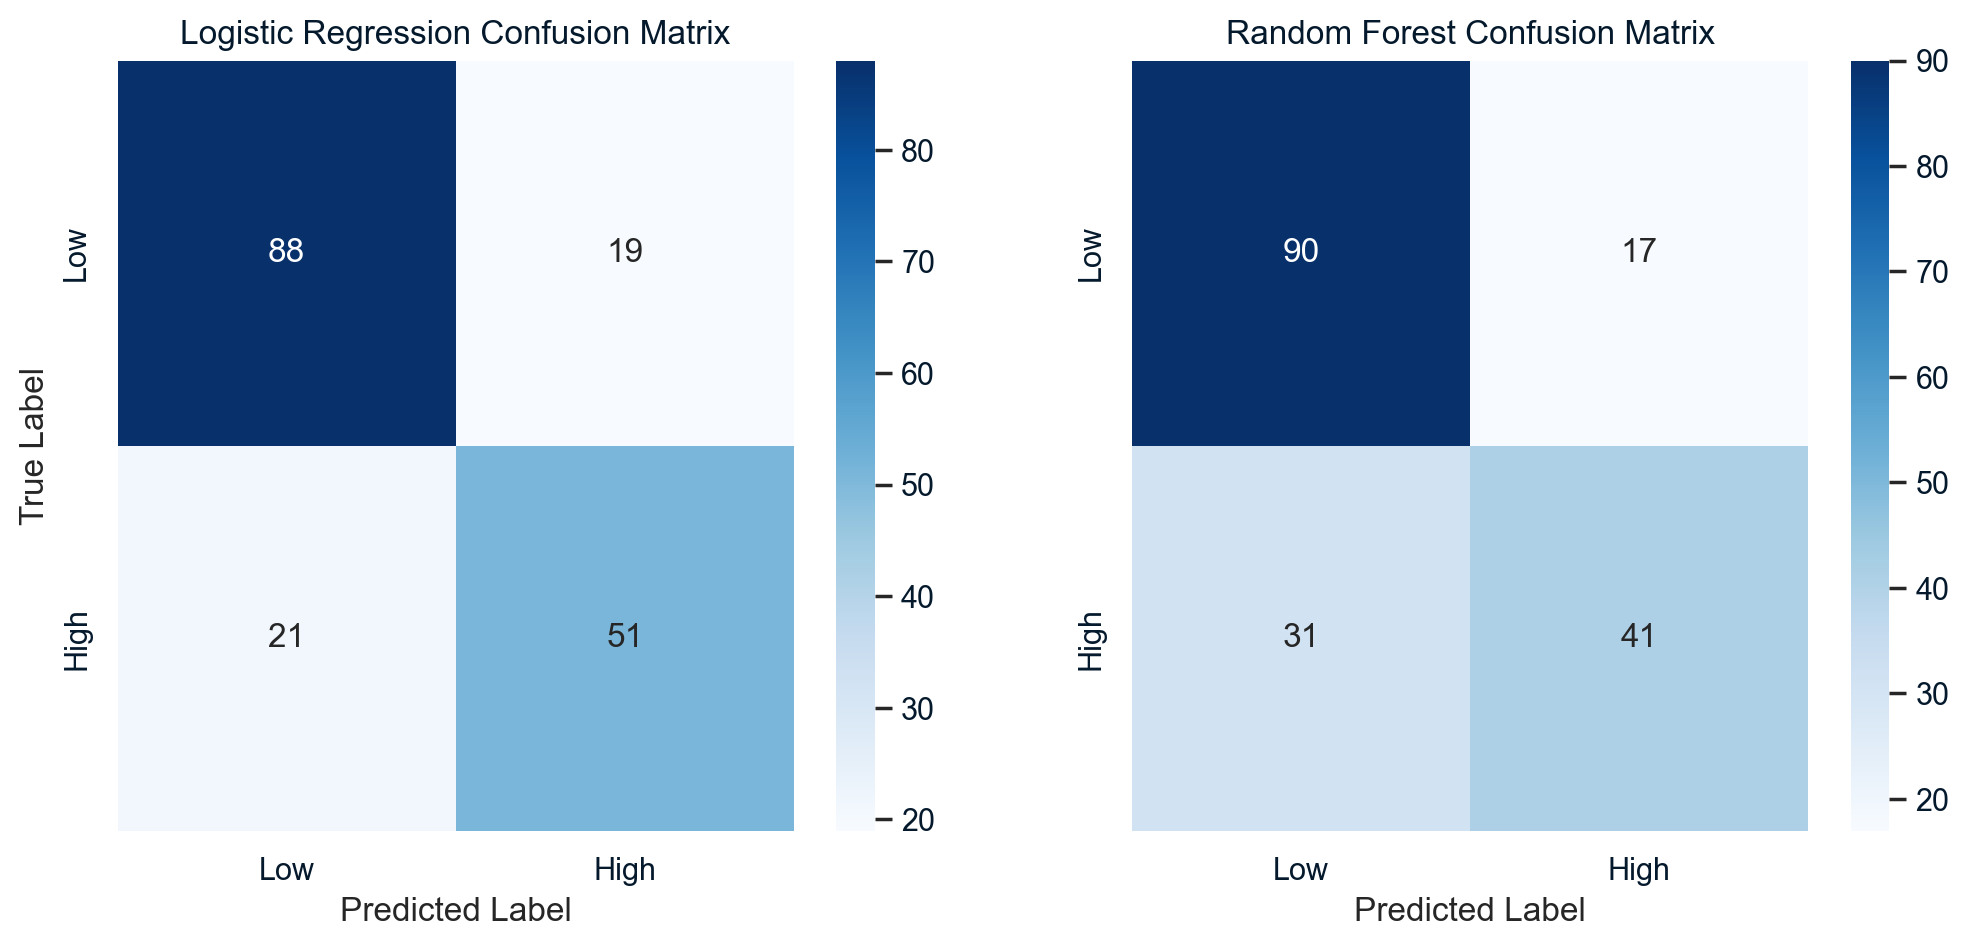

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'], ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Label")

plt.show()


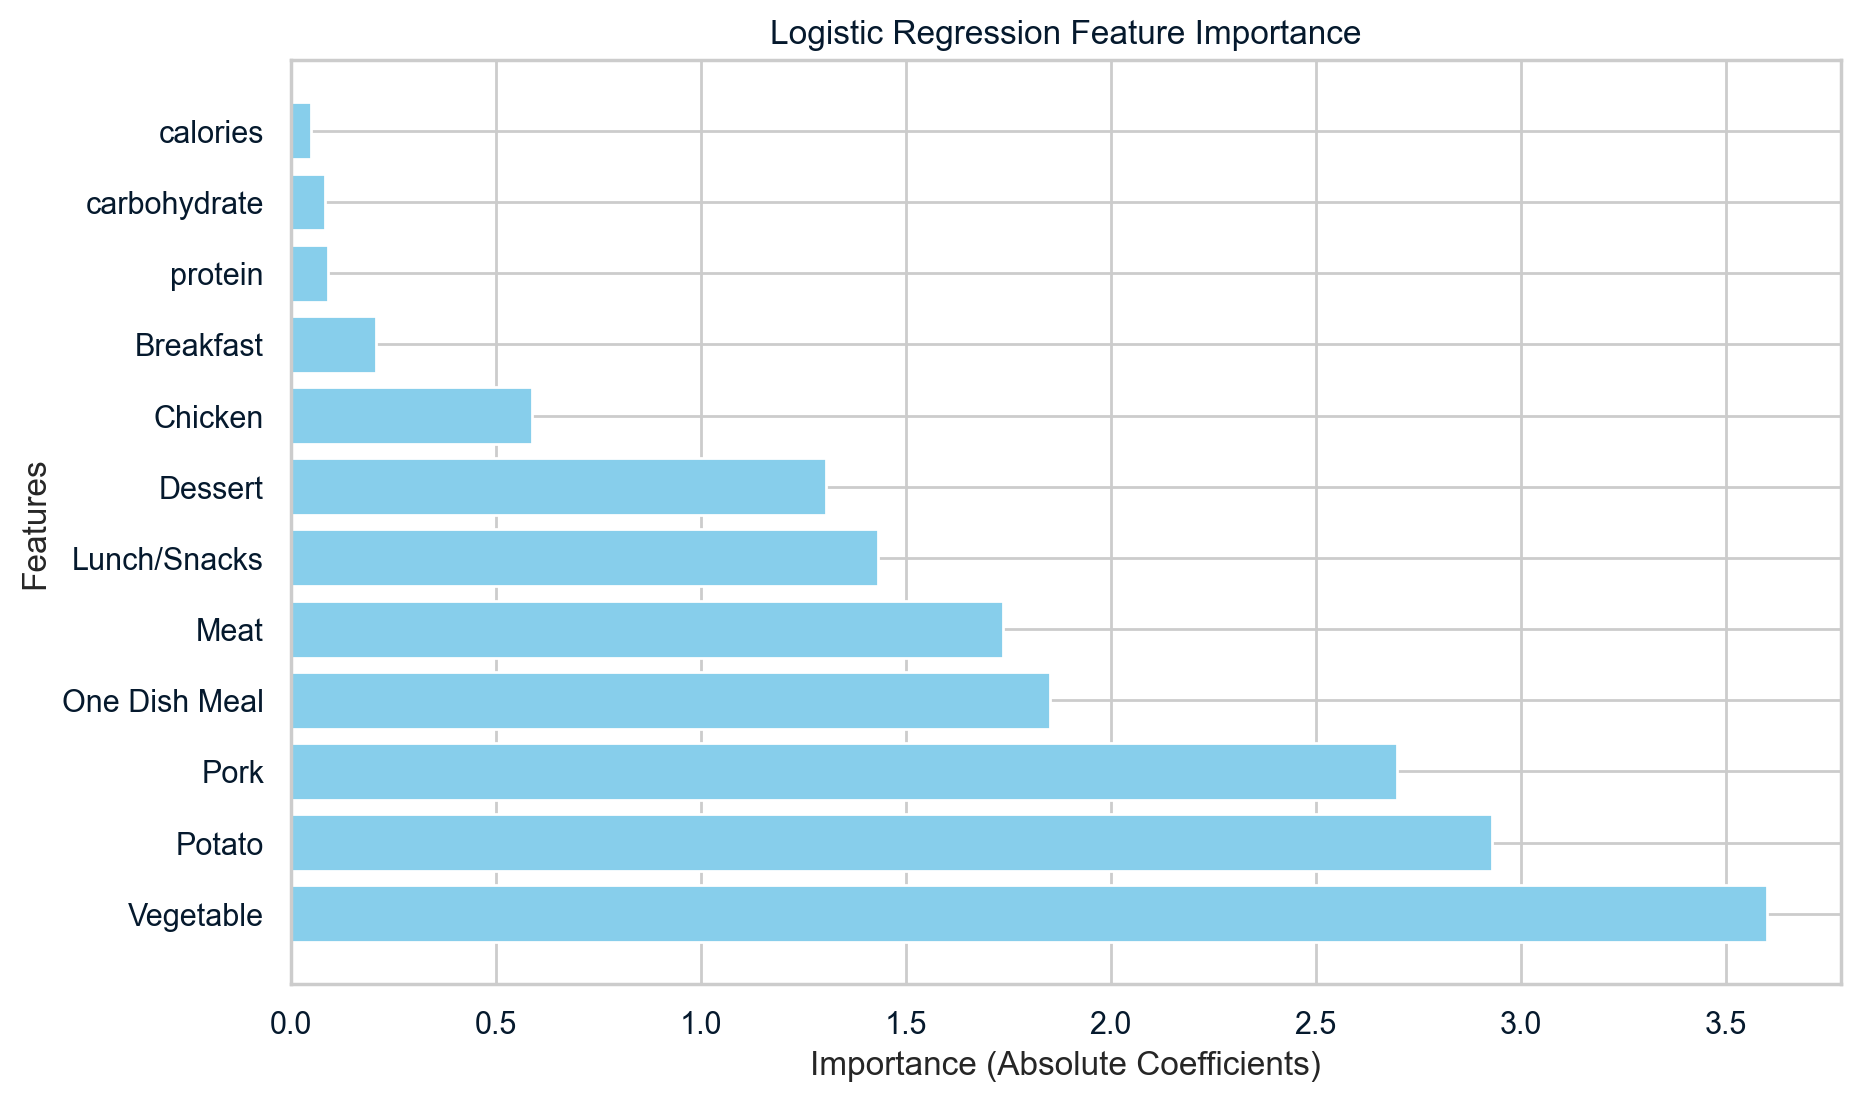

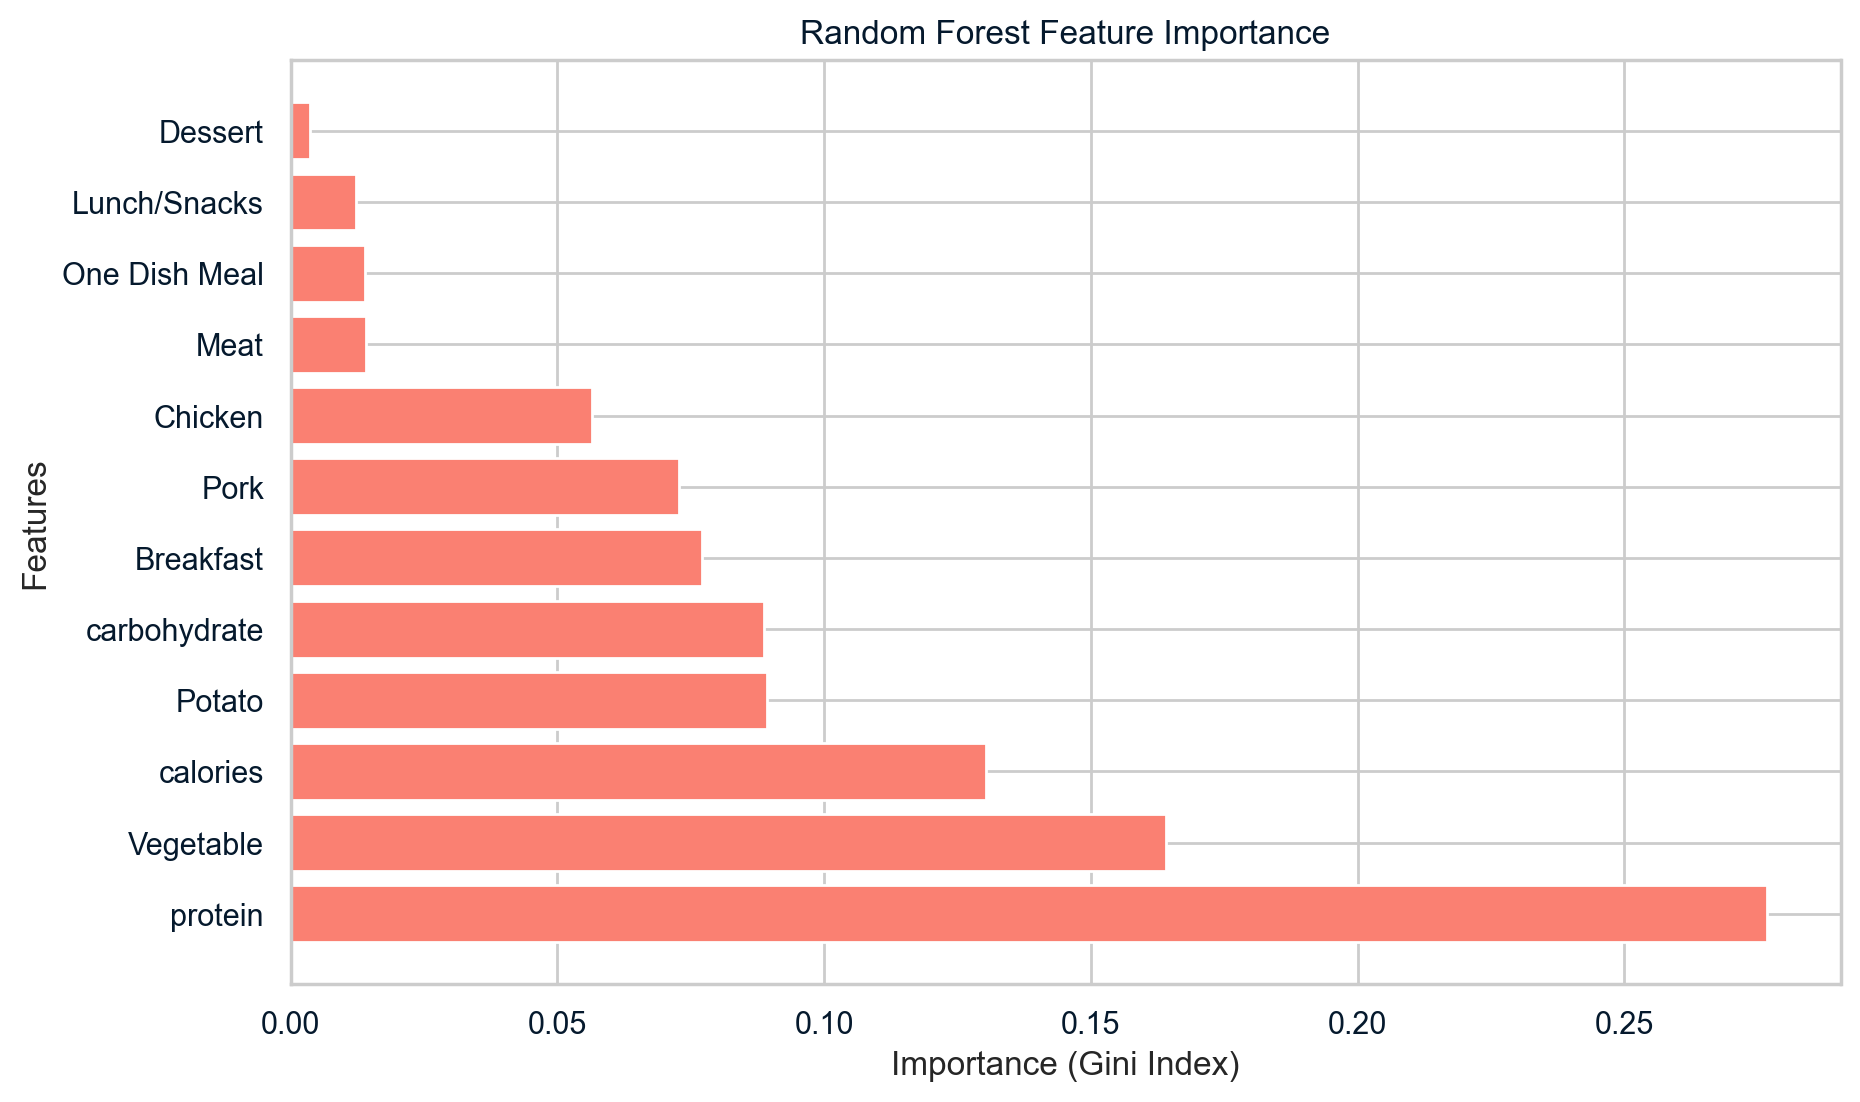

In [79]:
# 1. Logistic Regression Feature Importance (Using Coefficients)
log_reg_coeff = model.coef_[0]  # Extracting the coefficients
log_reg_feature_importance = np.abs(log_reg_coeff)  # Taking the absolute value for importance

# Ensure that we only use the columns used in the logistic regression model
log_reg_columns = X_train.columns  # Extract the feature names used in model

# Sorting features by importance
log_reg_sorted_idx = np.argsort(log_reg_feature_importance)[::-1]

# Plotting Logistic Regression Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(log_reg_columns[log_reg_sorted_idx],
         log_reg_feature_importance[log_reg_sorted_idx], color='skyblue')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Importance (Absolute Coefficients)")
plt.ylabel("Features")
plt.show()

# 2. Random Forest Feature Importance
rf_feature_importance = rf_model.feature_importances_

# Sorting features by importance
rf_sorted_idx = np.argsort(rf_feature_importance)[::-1]

# Ensure we use the same features as in Random Forest training
rf_columns = X_train.columns  # Same columns used for Random Forest

# Plotting Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_columns[rf_sorted_idx], 
         rf_feature_importance[rf_sorted_idx], color='salmon')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance (Gini Index)")
plt.ylabel("Features")
plt.show()

Here, we compare **feature importance** for both Logistic Regression and Random Forest models. For Logistic Regression, feature importance is based on the **absolute values of the model coefficients**. For Random Forest, it's based on the **Gini index values**. Both are visualized through bar charts, showing which features are most influential in each model.
We can see that **Vegetable** and **Potato** are the two most important features in Logistic Regression. These two features are also significant in Random Forest, if not the most important. Conversely, **Protein** is the most important feature in Random Forest but of little significance in case of Logistic Regression. This can be due to the different mechanisms in which the two models function.

# Business Metrics

The goals of this project is to:
Predict which recipes lead to **high traffic** & Correctly predict high traffic recipes **80%** of the time.
**None of the two** models have 80% accuracy but they are close. We can bring in another metric - **Key Performance Indicator (KPI)** to take into account the **accuracy of predicting high traffic.** This can possibly lead us to achieving our goal.

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predictions from both models
log_reg_pred = model.predict(X_test)  # Logistic Regression predictions
rf_pred = rf_model.predict(X_test)  # Random Forest predictions

# KPI Calculation for Logistic Regression
log_reg_precision = precision_score(y_test, log_reg_pred, pos_label='High')  # Precision for Logistic Regression
log_reg_recall = recall_score(y_test, log_reg_pred, pos_label='High')  # Recall for Logistic Regression
log_reg_f1 = f1_score(y_test, log_reg_pred, pos_label='High')  # F1-Score for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)  # Accuracy for Logistic Regression

# KPI Calculation for Random Forest
rf_precision = precision_score(y_test, rf_pred, pos_label='High')  # Precision for Random Forest
rf_recall = recall_score(y_test, rf_pred, pos_label='High')  # Recall for Random Forest
rf_f1 = f1_score(y_test, rf_pred, pos_label='High')  # F1-Score for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)  # Accuracy for Random Forest

# Displaying the results
print(f"Logistic Regression - Precision: {log_reg_precision:.4f}, Recall: {log_reg_recall:.4f}, F1-Score: {log_reg_f1:.4f}, Accuracy: {log_reg_accuracy:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}, Accuracy: {rf_accuracy:.4f}")

# Deciding which model is better based on F1-Score
if log_reg_f1 > rf_f1:
    print("\nLogistic Regression is the better model based on F1-Score.")
else:
    print("\nRandom Forest is the better model based on F1-Score.")

Logistic Regression - Precision: 0.8073, Recall: 0.8224, F1-Score: 0.8148, Accuracy: 0.7765
Random Forest - Precision: 0.7438, Recall: 0.8411, F1-Score: 0.7895, Accuracy: 0.7318

Logistic Regression is the better model based on F1-Score.


**Precision** indicates how many of the predicted high traffic events were actually high.
**Recall** tells how many of the actual high traffic events were predicted as high.
**F1-Score** balances Precision and Recall and is often considered the **best measure** when dealing with imbalanced datasets.
**Accuracy** gives an overall success rate but might not reflect model performance well if classes are imbalanced (which is the case here as we had more data for 'High' compared to 'Low' traffic).
The **F1-Score** is being used here as the primary metric to choose the **better model**, which makes sense when balancing false positives and false negatives is important. **Logistic Regression** turns out to be the better of the two (with **more than 80%** F-1 score which is our metric/KPI for prediction accuracy here).

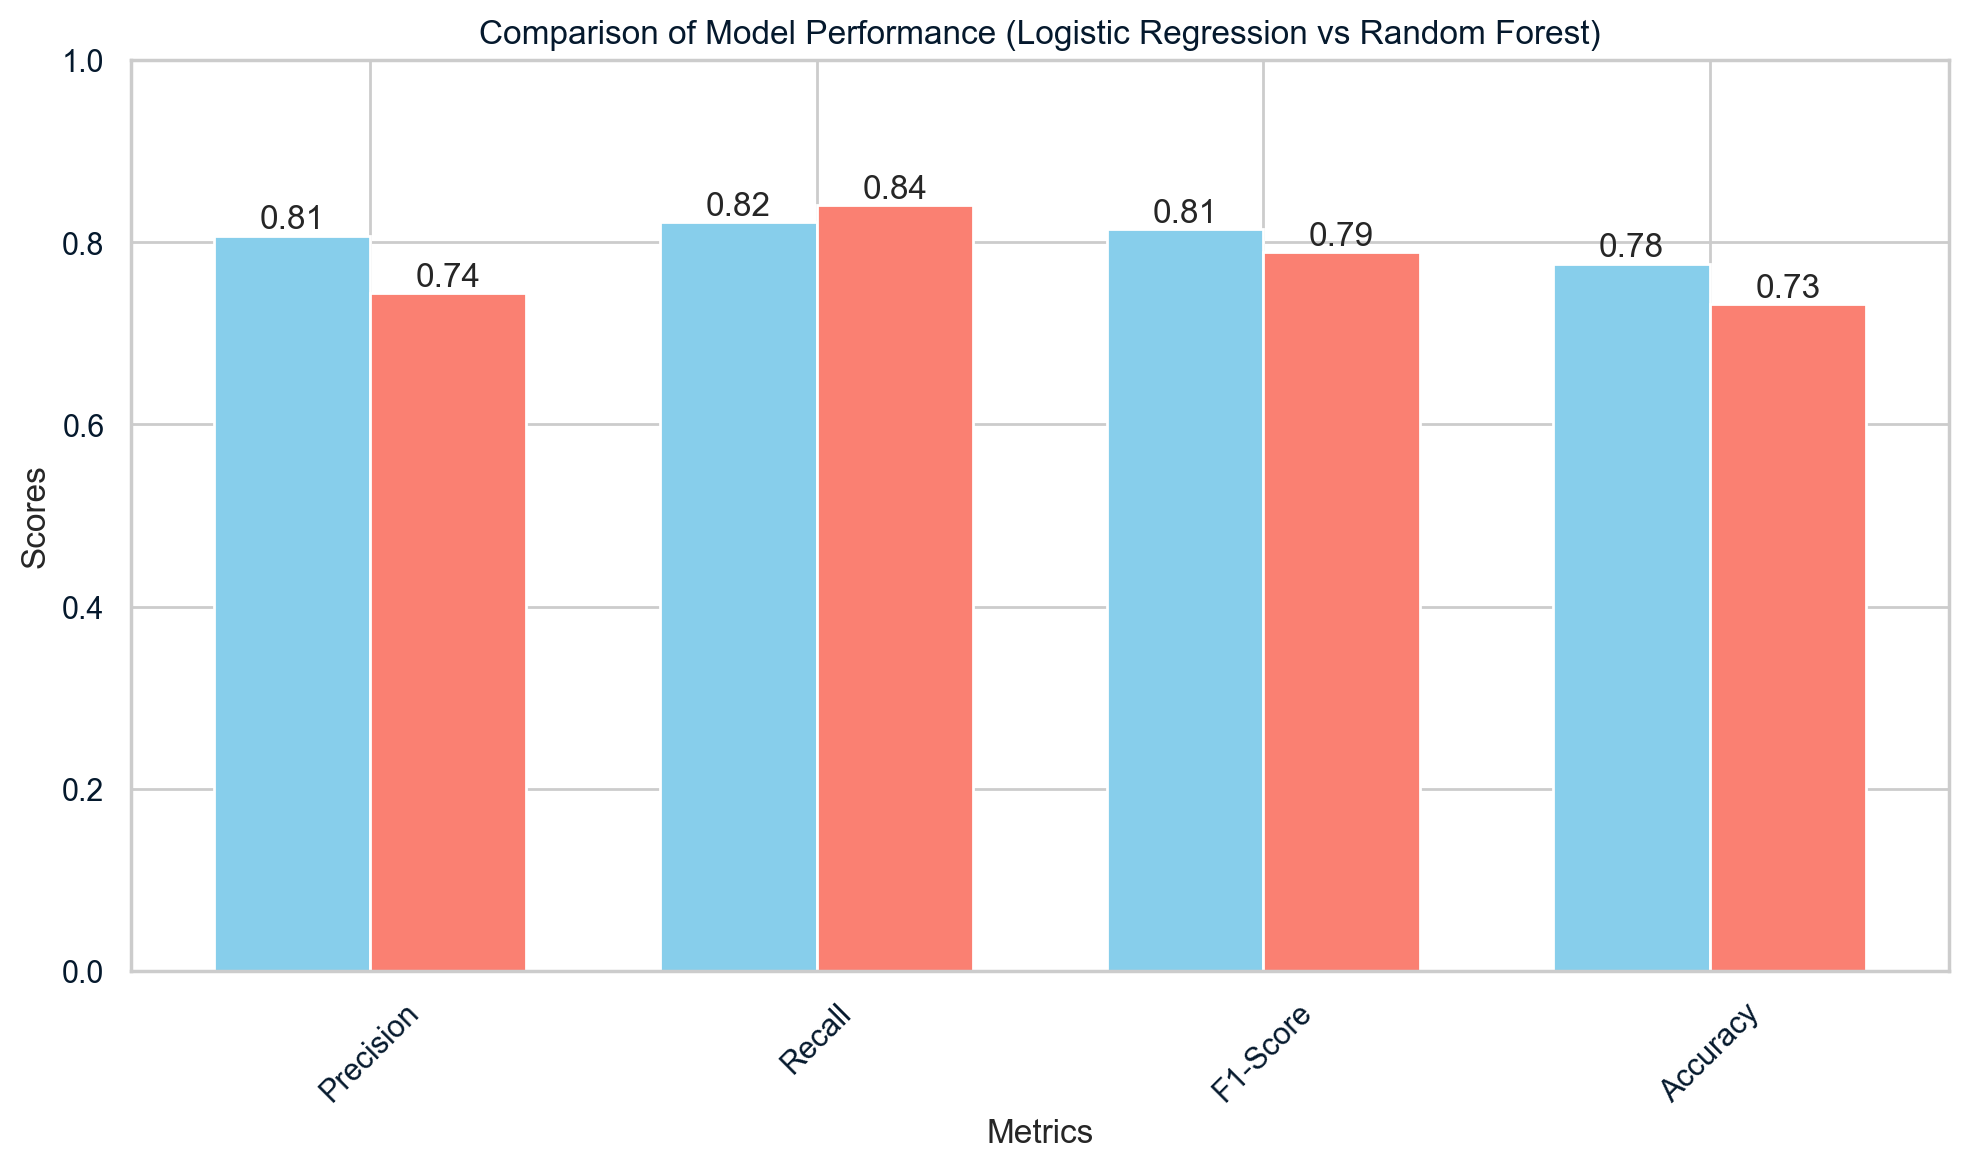

In [81]:
# List of metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Logistic Regression and Random Forest scores
log_reg_scores = [log_reg_precision, log_reg_recall, log_reg_f1, log_reg_accuracy]
rf_scores = [rf_precision, rf_recall, rf_f1, rf_accuracy]

# Set the x-axis locations for the bars
x = np.arange(len(metrics))

# Define the width of the bars
width = 0.35  

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for both models
bars1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='salmon')

# Adding some labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (Logistic Regression vs Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.set_ylim(0, 1)  # Set y-axis limit for better comparison (0 to 1)

# Displaying the values on top of the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

add_labels(bars1)  # Add labels for Logistic Regression
add_labels(bars2)  # Add labels for Random Forest

# Display the plot
plt.tight_layout()
plt.show()

**Logistic Regression** outperforms Random Forest in all metrics except Recall. This will be our choice for predicting the traffic of recipes for **Tasty Bytes**.

# Summary and Recommendations

In this project, we applied **Logistic Regression** and **Random Forest** models to predict traffic conditions based on a preprocessed dataset. We performed **data cleaning**, including handling missing values and one-hot encoding categorical features. Both models were trained and **evaluated** using accuracy, precision, recall, F1-Score, and confusion matrices. We also analyzed the feature importance for each model to understand the contribution of different features. The models were compared based on **KPIs**, such as F1-Score, and visualized using bar plots. The final model selection was made based on the evaluation results, choosing the one that performed better (Logistic Regression) in **predicting high traffic** conditions, using **F-1 score** as the final metric.

The following **recommendations** are made to the business:

1. **Focus on Key Features:** Since the models identified specific features ('Vegetable', 'Potato', 'Protein') as most influential in predicting high traffic, Tasty Bytes can enhance data collection and analysis on these key factors.

2. **Real-Time Traffic Insights:** By integrating traffic prediction models into real-time systems, Tasty Bytes can optimize logistics and improve customer service, assisting in better decision-making related to deliveries, staffing, and inventory management.

3. **Targeted Marketing and Customer Engagement:** With insights from the traffic prediction models, Tasty Bytes can create personalized marketing campaigns and notifications.

4. **Improve Operational Efficiency:** The models can be used to predict high traffic volumes, allowing Tasty Bytes to better manage operational tasks such as kitchen workflows, and order fulfillment during peak times.

5. **Address Class Imbalance in Data:** Since the traffic prediction models may have been impacted by class imbalance (with more instances of high traffic), Tasty Bytes should explore techniques like SMOTE (Synthetic Minority Over-sampling Technique) or collecting more data for low traffic.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation